## Задание 3

Провести компьютерный эксперимент по модели структурного разрушения на графе из 50+12=62 вершин, разместив эпицентр в центральной вершине. Рассчитать время разрушения по критерию связности. Визуализировать процесс структурного разрушения.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random


In [2]:
import sys
from loguru import logger
logger.add("file_py.log",mode="w", format="{time:YYYY-MM-DD HH:mm:ss} {level} {message}", level="INFO")

1

In [3]:
DEF_COLOR = "fuchsia"#"mistyrose"
RES_COLOR = "darkorchid" #"fuchsia"
FONT_COLOR = "black"
IMG_PATH = "/imgs/"

SLUCH_COLOR = "turquoise"
FRACT_COLOR = "chocolate"
WORLD_COLOR = "salmon"

P = 0.05
K = 0.5
SEED = 123

In [4]:
def print_graf(gr, save=False, filename="foo"):#рисует граф и сохраняет картинку
    plt.rcParams ['figure.figsize'] = [20, 20] #увеличиваем размер полотна для вывода графа
    pos = nx.get_node_attributes(gr, 'pos')
    if len(pos) ==0:
        # pos = nx.circular_layout(gr)
        pos =  nx.spring_layout(gr)
    edge_labels = nx.get_edge_attributes(gr, "weight")
    node_color = tuple(nx.get_node_attributes(gr, "node_color").values())
    edge_color =  tuple(nx.get_edge_attributes(gr, "edge_color").values())
    if len(node_color)==0:
        node_color=DEF_COLOR
        nx.set_node_attributes(gr, "node_color",DEF_COLOR )
    if len(edge_color)==0:
        edge_color = DEF_COLOR
        nx.set_edge_attributes(gr, "edge_color",DEF_COLOR )
    options = {
        # "arrowsize" : 15,# size of arrow
        # 'arrowstyle': '-|>',        # array style for directed graph
        "edge_color": edge_color, # edge color
        "node_color": node_color,
        "node_size" : 1000,
        'width': 2,
        'font_color':FONT_COLOR,
    }
    nx.draw(gr, pos,  with_labels=True, arrows=True, **options)
    nx.draw_networkx_edge_labels(gr, pos, edge_labels=edge_labels)
    # hvnx.draw(gr, pos, node_color='lightgray').opts(tools=[HoverTool(tooltips=[('index', '@index_hover')])])
    plt.show()
    if save:
        plt.savefig(IMG_PATH+filename+'.png')

In [21]:
def print_info_graf(gr, printing = True):#выводит информацию о ребрах графа
    graf_info={}
    testG = nx.Graph()
    testG.add_edges_from(list(gr.edges()))
    graf_info["radius"] = nx.radius(testG)
    graf_info["diameter"] = nx.diameter(testG)
    if printing:
        # print("Рёбра графа:")
        # for edge in gr.edges(data=True):
        #     print(edge, end=',')
        print("Радиус графа: ",nx.radius(testG))
        print("Диаметр графа: ", nx.diameter(testG))

        if nx.is_directed(gr):
            if nx.is_weakly_connected(gr):
                print('Граф является направленным и состоит из одной компоненты слабой связности.')
            else:
                print('Граф является направленным и состоит из нескольких компонент.')
        else:
            if nx.is_connected(gr):
                print('Граф является ненаправленным и связным.')
            else:
                print('Граф является ненаправленным и состоит из нескольких компонент.')
        print("Плотность графа, отношение рёбер и узлов: ", nx.density(gr))
        # Коэффициент ассортативности (насколько вся сеть завязана на основных "хабах"):
        print("Эксцентриситет узлов:")
        ecc = nx.eccentricity(gr)
        print(ecc)
        print("Коэффициент ассортативности:",nx.degree_pearson_correlation_coefficient(gr))
        # print("Центральность узлов:")
        # deg = nx.degree_centrality(gr)
        # for nodeid in sorted(deg, key=deg.get, reverse=True):
        #     print(nodeid)
    return graf_info

In [22]:
def set_graf_color(gr, node_color = DEF_COLOR, edge_color = False):
    if not edge_color:
        edge_color = node_color
    for node in gr.nodes():
        gr.nodes()[node]["node_color"] = node_color
    for edge in gr.edges():
        gr.edges()[edge]["edge_color"] = edge_color

In [23]:
def set_node_color(gr, node, col):
    gr.nodes()[node]["node_color"] = col

In [24]:
def set_edge_color(gr, u, v, col):
    gr.edges()[(u, v)]["edge_color"] = col

In [25]:
def has_edge(u, v, gr):#проверка существования ребра
    return  ((u,v) in gr.edges() or (v,u) in gr.edges())

In [26]:
def gen_sluch_graph(V, M=False, SEED=SEED):
    """
    V - кол-во вершин,
    M - кол-во ребер
    """
    if M<200:
        g = nx.gnm_random_graph(V, M, seed=SEED)
        while not nx.is_connected(g):
            g = nx.gnm_random_graph(V, M, seed=SEED)
            SEED+=1
    else:
        g = nx.gnp_random_graph(V, P, seed=SEED)
        while not nx.is_connected(g):
            g = nx.gnp_random_graph(V, P, seed=SEED)
            SEED+=1
    return g

In [27]:
V = 62     #количество вершин
M = 70
P = 0.1
K = 5

CN = 5
CMAX = 9
CMIN = 5
CRIT = 10

In [28]:
def set_currents(gr, cmin=CMIN, cmax=CMAX):
    for node in gr.nodes():
        gr.nodes()[node]["cur"] = random.randint(cmin, cmax)

In [29]:
def print_current_list(gr):
    cur = nx.get_node_attributes(gr, "cur")
    for i in cur:
        print("Вершина", i, "-- загрузка", cur[i])

In [30]:
def set_node_cur(gr, node, cur):
    gr.nodes()[node]["cur"] = cur

In [31]:
def get_node_cur(gr, node):
    return gr.nodes()[node]["cur"]

In [32]:
G = gen_sluch_graph(V,M)

In [33]:
set_graf_color(G, SLUCH_COLOR)

In [34]:
set_currents(G)


In [35]:
print_info_graf(G)

Радиус графа:  7
Диаметр графа:  13
Граф является ненаправленным и связным.
Плотность графа, отношение рёбер и узлов:  0.0370174510840825
Эксцентриситет узлов:
{0: 8, 1: 9, 2: 8, 3: 7, 4: 11, 5: 13, 6: 12, 7: 12, 8: 12, 9: 11, 10: 12, 11: 9, 12: 12, 13: 7, 14: 13, 15: 8, 16: 11, 17: 8, 18: 9, 19: 9, 20: 10, 21: 8, 22: 9, 23: 9, 24: 7, 25: 12, 26: 10, 27: 8, 28: 9, 29: 7, 30: 11, 31: 8, 32: 11, 33: 11, 34: 12, 35: 10, 36: 13, 37: 9, 38: 11, 39: 9, 40: 10, 41: 10, 42: 9, 43: 9, 44: 10, 45: 7, 46: 13, 47: 11, 48: 10, 49: 10, 50: 12, 51: 10, 52: 9, 53: 10, 54: 8, 55: 9, 56: 9, 57: 10, 58: 10, 59: 12, 60: 12, 61: 8}
Коэффициент ассортативности: -0.17348927875243664


{'radius': 7, 'diameter': 13}

Так как:
радиус графа - 7
эксцентриситет узла 3 - 7
то это центральный узел

In [36]:
print_current_list(G)

Вершина 0 -- загрузка 7
Вершина 1 -- загрузка 6
Вершина 2 -- загрузка 6
Вершина 3 -- загрузка 6
Вершина 4 -- загрузка 6
Вершина 5 -- загрузка 8
Вершина 6 -- загрузка 6
Вершина 7 -- загрузка 6
Вершина 8 -- загрузка 7
Вершина 9 -- загрузка 9
Вершина 10 -- загрузка 6
Вершина 11 -- загрузка 6
Вершина 12 -- загрузка 9
Вершина 13 -- загрузка 9
Вершина 14 -- загрузка 5
Вершина 15 -- загрузка 5
Вершина 16 -- загрузка 6
Вершина 17 -- загрузка 7
Вершина 18 -- загрузка 6
Вершина 19 -- загрузка 7
Вершина 20 -- загрузка 9
Вершина 21 -- загрузка 8
Вершина 22 -- загрузка 6
Вершина 23 -- загрузка 5
Вершина 24 -- загрузка 5
Вершина 25 -- загрузка 8
Вершина 26 -- загрузка 7
Вершина 27 -- загрузка 7
Вершина 28 -- загрузка 6
Вершина 29 -- загрузка 8
Вершина 30 -- загрузка 7
Вершина 31 -- загрузка 7
Вершина 32 -- загрузка 7
Вершина 33 -- загрузка 6
Вершина 34 -- загрузка 7
Вершина 35 -- загрузка 7
Вершина 36 -- загрузка 6
Вершина 37 -- загрузка 8
Вершина 38 -- загрузка 5
Вершина 39 -- загрузка 8
Вершина 40

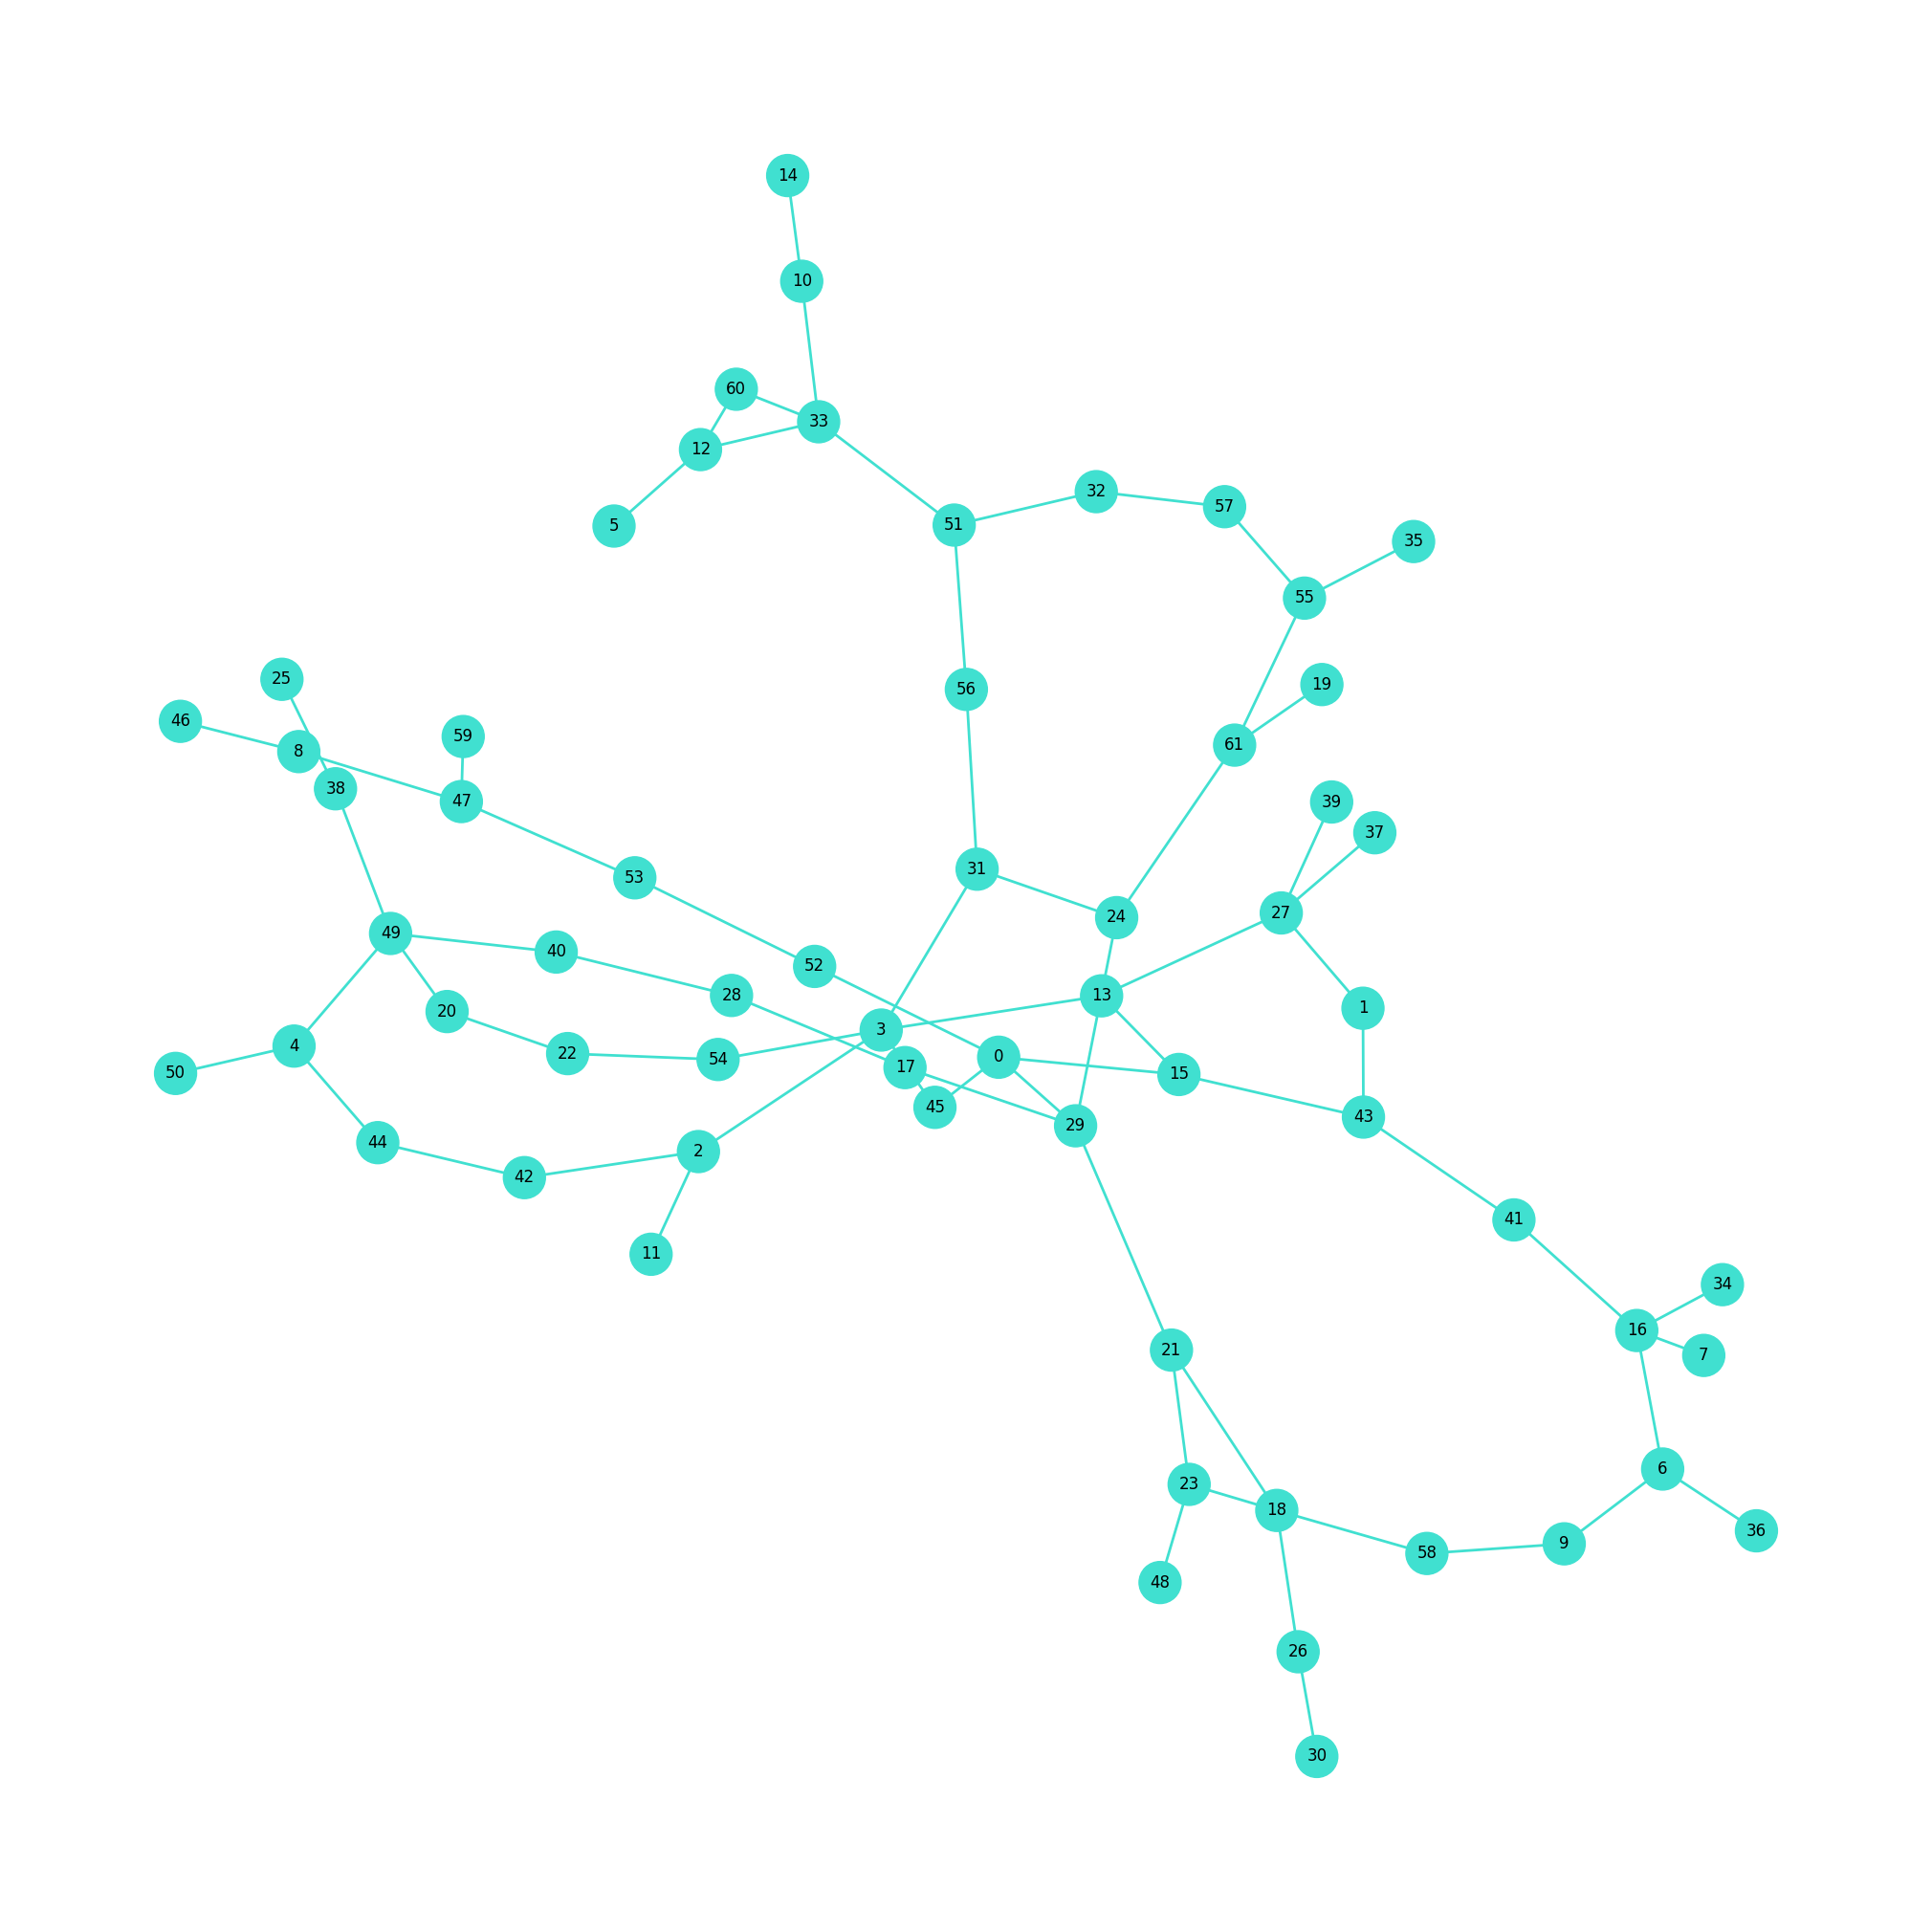

In [37]:
print_graf(G)

In [38]:
def is_crit_node(gr, node):
    return gr.nodes()[node]["cur"] >= CRIT

In [39]:
def graph_color_update(gr):
    for node in gr.nodes():
        if is_crit_node(gr, node):
            set_node_color(gr, node, RES_COLOR)
            neighs = list(nx.neighbors(gr, node))
            # print(neighs)
            for n in neighs:
                set_edge_color(gr, node, n, RES_COLOR)

In [40]:
def step(gr, all_system_effect=False):
    st_gr = gr.copy()
    for node in st_gr.nodes():
        if is_crit_node(st_gr, node):
            neighs = list(nx.neighbors(gr, node))
            neighs = [n for n in neighs  if not is_crit_node(st_gr, n)]
            if len(neighs)>0:
                add_cur = get_node_cur(gr, node)/len(neighs)
                # print(add_cur, neighs)
                for n in neighs:
                    new_cur = get_node_cur(gr, n) + add_cur
                    set_node_cur(gr, n, new_cur)
                    gr.remove_edge(n, node)
            elif all_system_effect:
                add_cur = get_node_cur(gr, node)/len(gr.nodes())
                # print("all_system",add_cur)
                for n in gr.nodes():
                    new_cur = get_node_cur(gr, n) + add_cur
                    set_node_cur(gr, n, new_cur)

            gr.remove_node(node)

In [41]:
def check_crit_connect(gr):
    if len(gr.nodes())==0:
        return True
    return not nx.is_connected(gr)

In [42]:
def check_total_destruction(gr):
    if len(gr.nodes()) == 0:
        return True
    for node in gr.nodes():
        neighs = list(nx.neighbors(gr, node))
        if len(neighs)>0:
            return False
    for node in gr.nodes():
        if is_crit_node(gr, node):
            print(node)
            return False
    return True

In [43]:
def analize(stat, labels):
    plt.rcParams ['figure.figsize'] = [16, 9] #уменьшаем размер полотна для вывода графика
    x = range(len(stat))
    y1 = [i[0] for i in stat]
    plt.plot(x, y1, 'o-b', alpha=0.6, label=labels[1], lw=4, mec='b', mew=1, ms=6)
    if len(stat[0])==2:
        y2 = [i[1]for i in stat]
        plt.plot(x, y2, 'o-b', alpha=0.6, label=labels[1], lw=4, mec='b', mew=1, ms=6)
    plt.title(labels[0])
    plt.legend()
    plt.grid(True)

In [46]:
def  destruction(gr, start_node, all_system_effect=False):
    logger.debug("debug 0")
    crit_connect = 0
    total_destruction = 0
    stable = 0
    loop = True
    stat = []
    destr_nodes=list(gr.nodes())
    logger.debug("debug {}", 2)
    set_node_cur(gr, start_node, CRIT)
    graph_color_update(gr)
    print_current_list(gr)
    print_graf(gr)
    stat.append(len(gr.nodes()))
    iters = 0
    while loop:
        iters+=1
        step(gr, all_system_effect)
        print("step", iters)
        graph_color_update(gr)
        print_graf(gr)
        stat.append(len(gr.nodes()))
        if check_crit_connect(gr) and crit_connect==0:
            crit_connect = iters
        if check_total_destruction(gr):
            loop = False
            total_destruction = iters
        if stat[-1]==stat[-2]:
            stable+=1
        if stable>=CN:
            loop = False
    return crit_connect, total_destruction, stat

2023-12-18 00:50:21.817 | DEBUG    | __main__:destruction:2 - debug 0
2023-12-18 00:50:21.818 | DEBUG    | __main__:destruction:9 - debug 2


Вершина 0 -- загрузка 7
Вершина 1 -- загрузка 6
Вершина 2 -- загрузка 10
Вершина 3 -- загрузка 6
Вершина 4 -- загрузка 6
Вершина 5 -- загрузка 8
Вершина 6 -- загрузка 6
Вершина 7 -- загрузка 6
Вершина 8 -- загрузка 7
Вершина 9 -- загрузка 9
Вершина 10 -- загрузка 6
Вершина 11 -- загрузка 6
Вершина 12 -- загрузка 9
Вершина 13 -- загрузка 9
Вершина 14 -- загрузка 5
Вершина 15 -- загрузка 5
Вершина 16 -- загрузка 6
Вершина 17 -- загрузка 7
Вершина 18 -- загрузка 6
Вершина 19 -- загрузка 7
Вершина 20 -- загрузка 9
Вершина 21 -- загрузка 8
Вершина 22 -- загрузка 6
Вершина 23 -- загрузка 5
Вершина 24 -- загрузка 5
Вершина 25 -- загрузка 8
Вершина 26 -- загрузка 7
Вершина 27 -- загрузка 7
Вершина 28 -- загрузка 6
Вершина 29 -- загрузка 8
Вершина 30 -- загрузка 7
Вершина 31 -- загрузка 7
Вершина 32 -- загрузка 7
Вершина 33 -- загрузка 6
Вершина 34 -- загрузка 7
Вершина 35 -- загрузка 7
Вершина 36 -- загрузка 6
Вершина 37 -- загрузка 8
Вершина 38 -- загрузка 5
Вершина 39 -- загрузка 8
Вершина 4

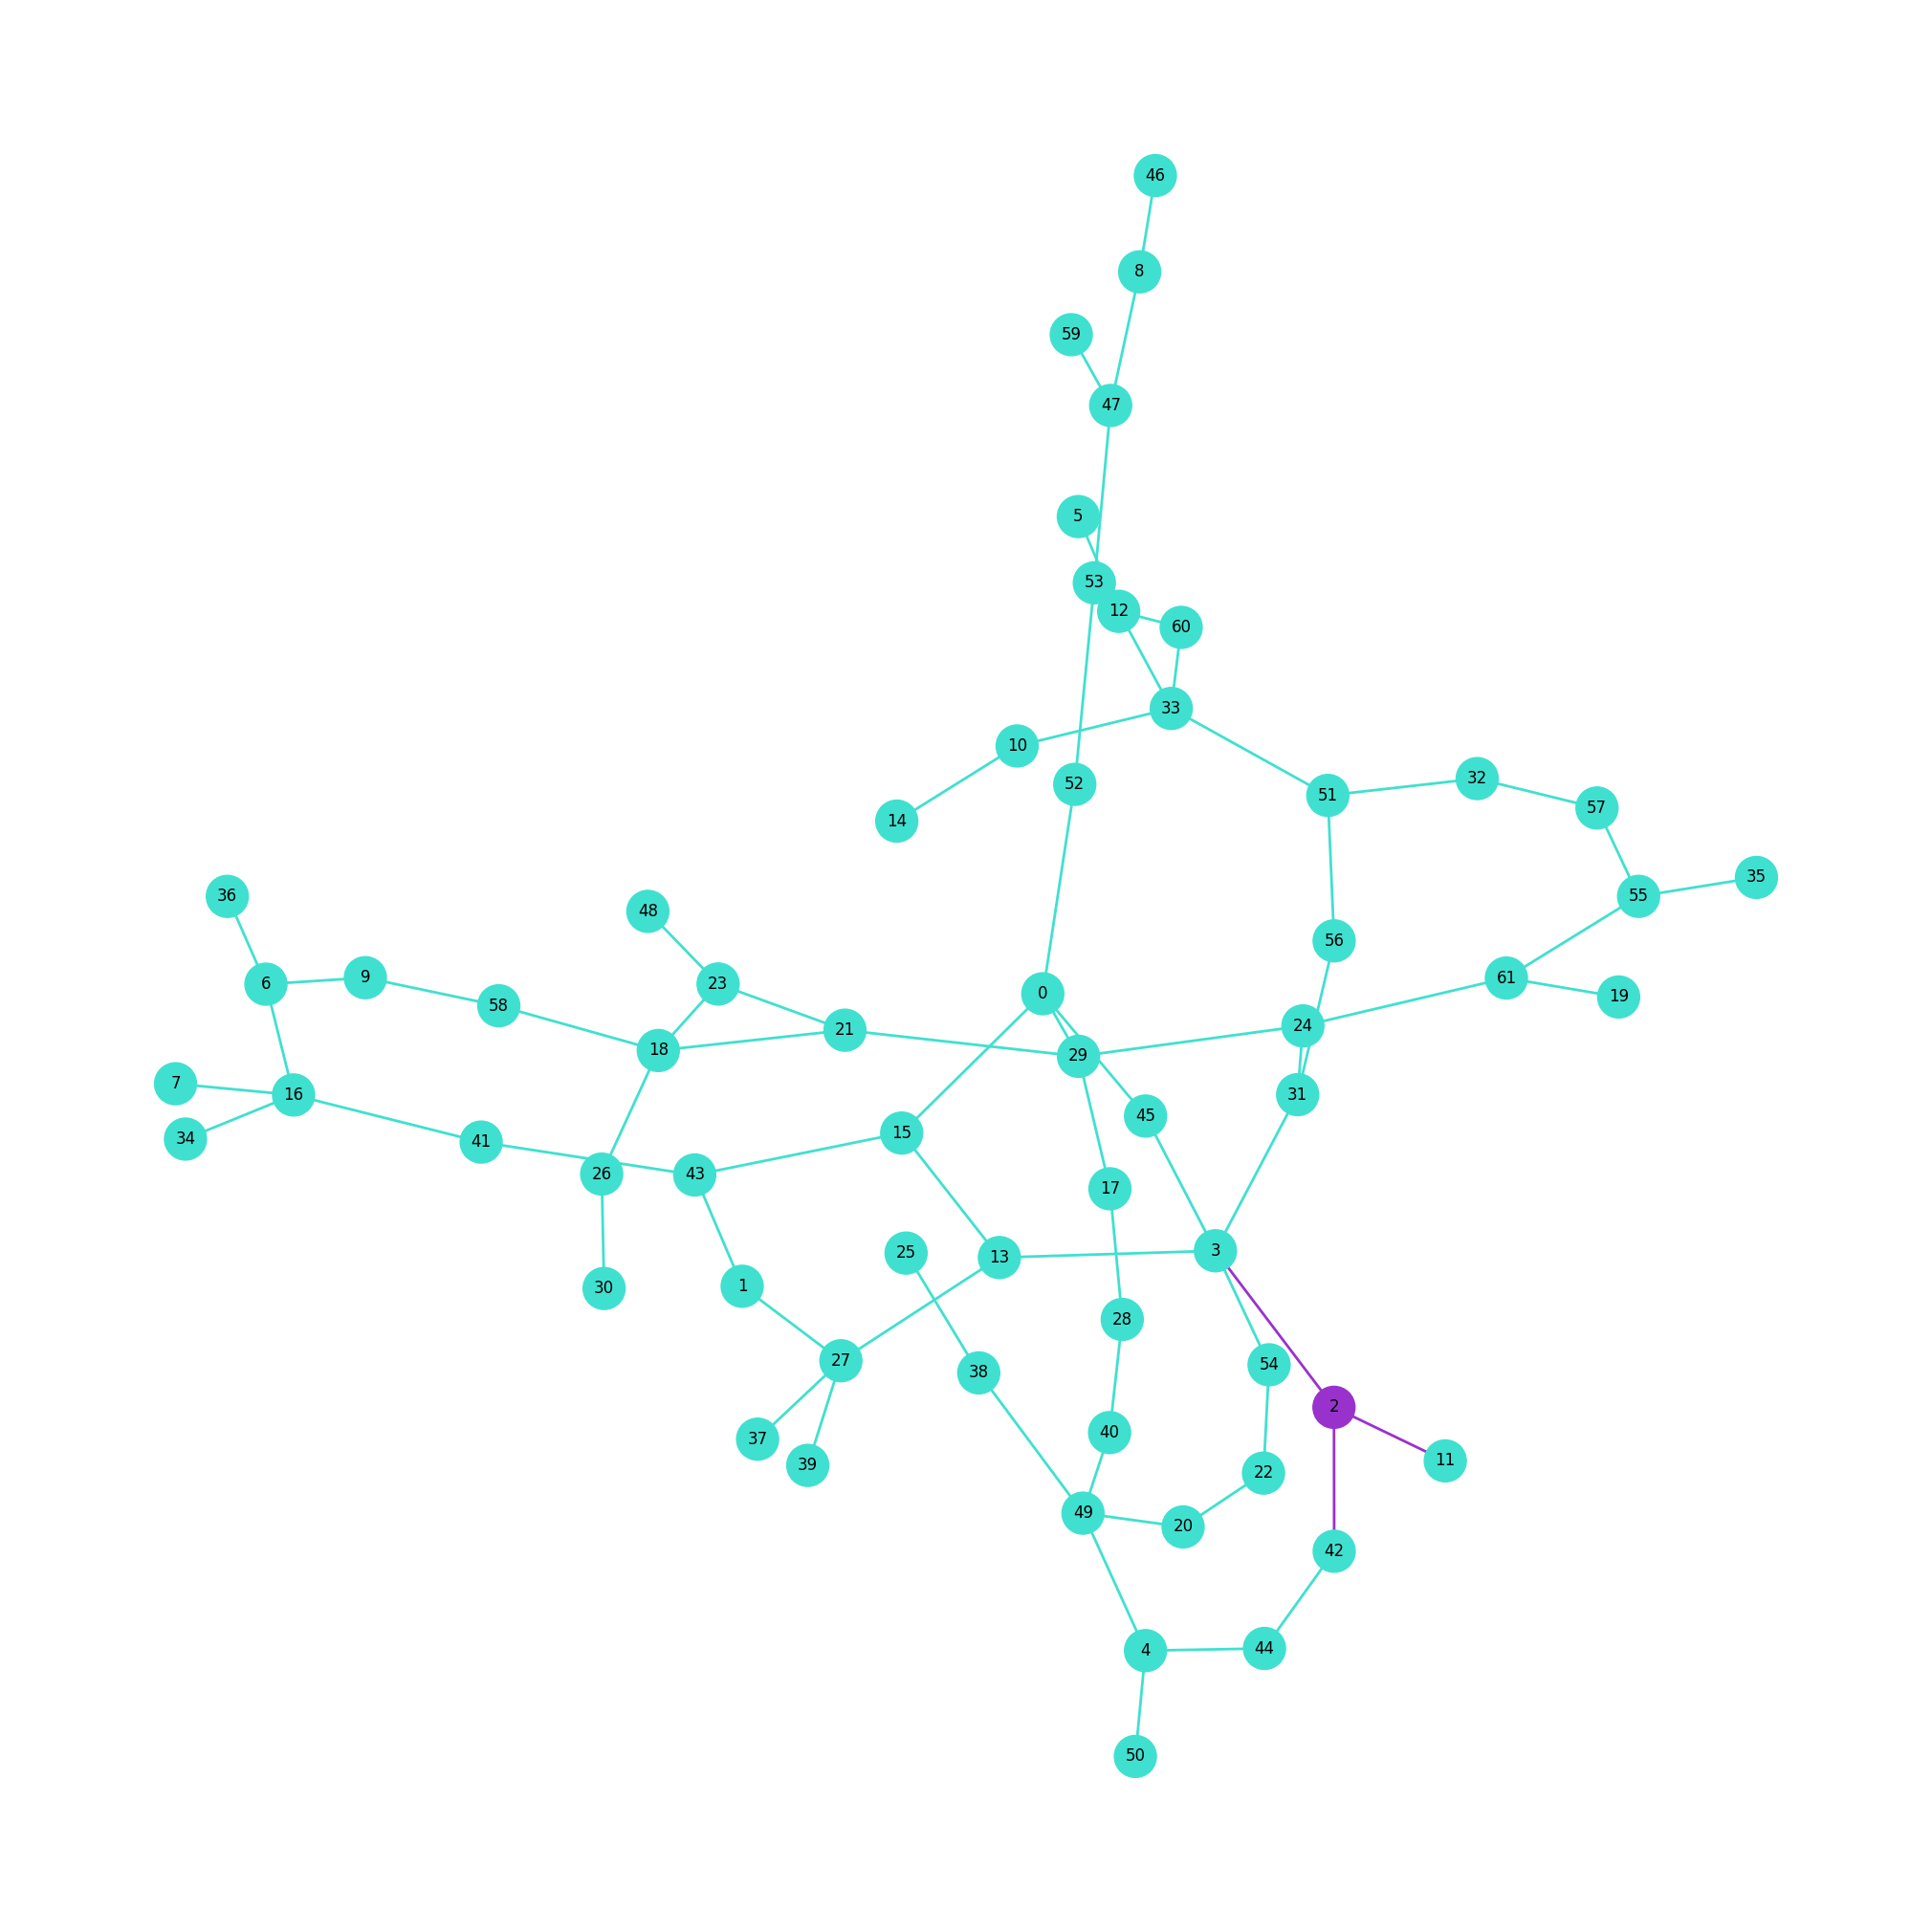

step 1


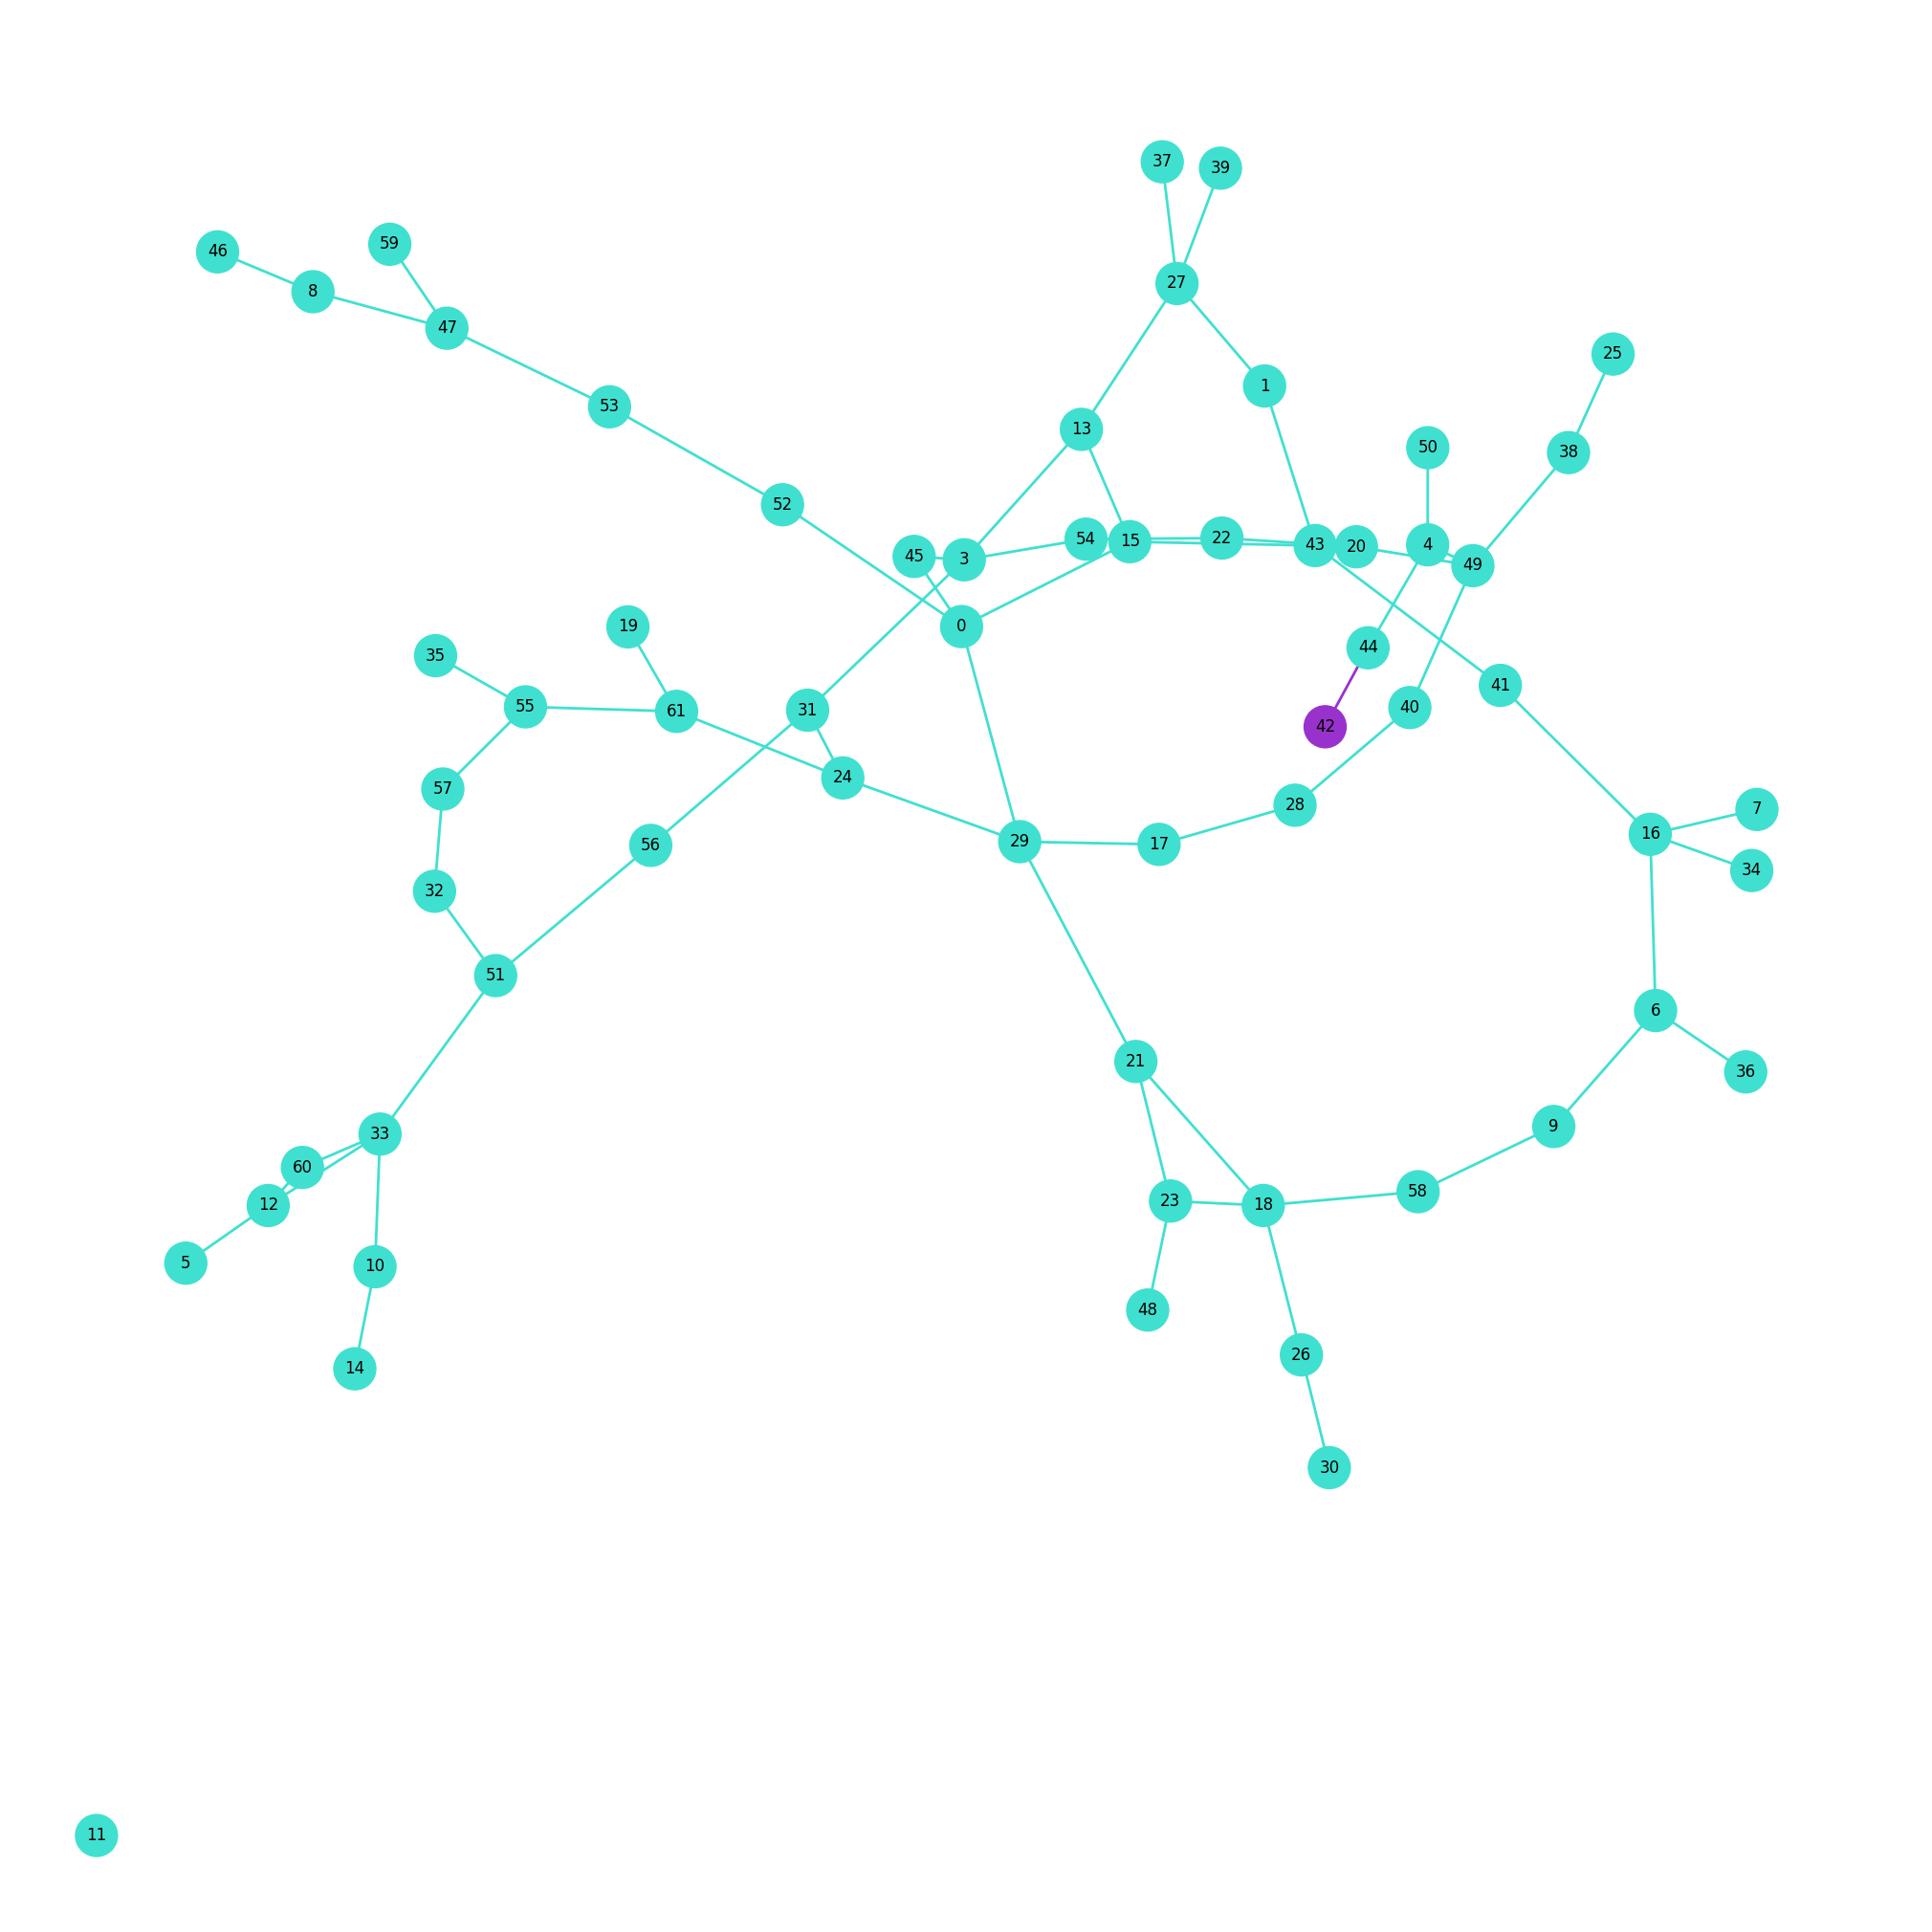

step 2


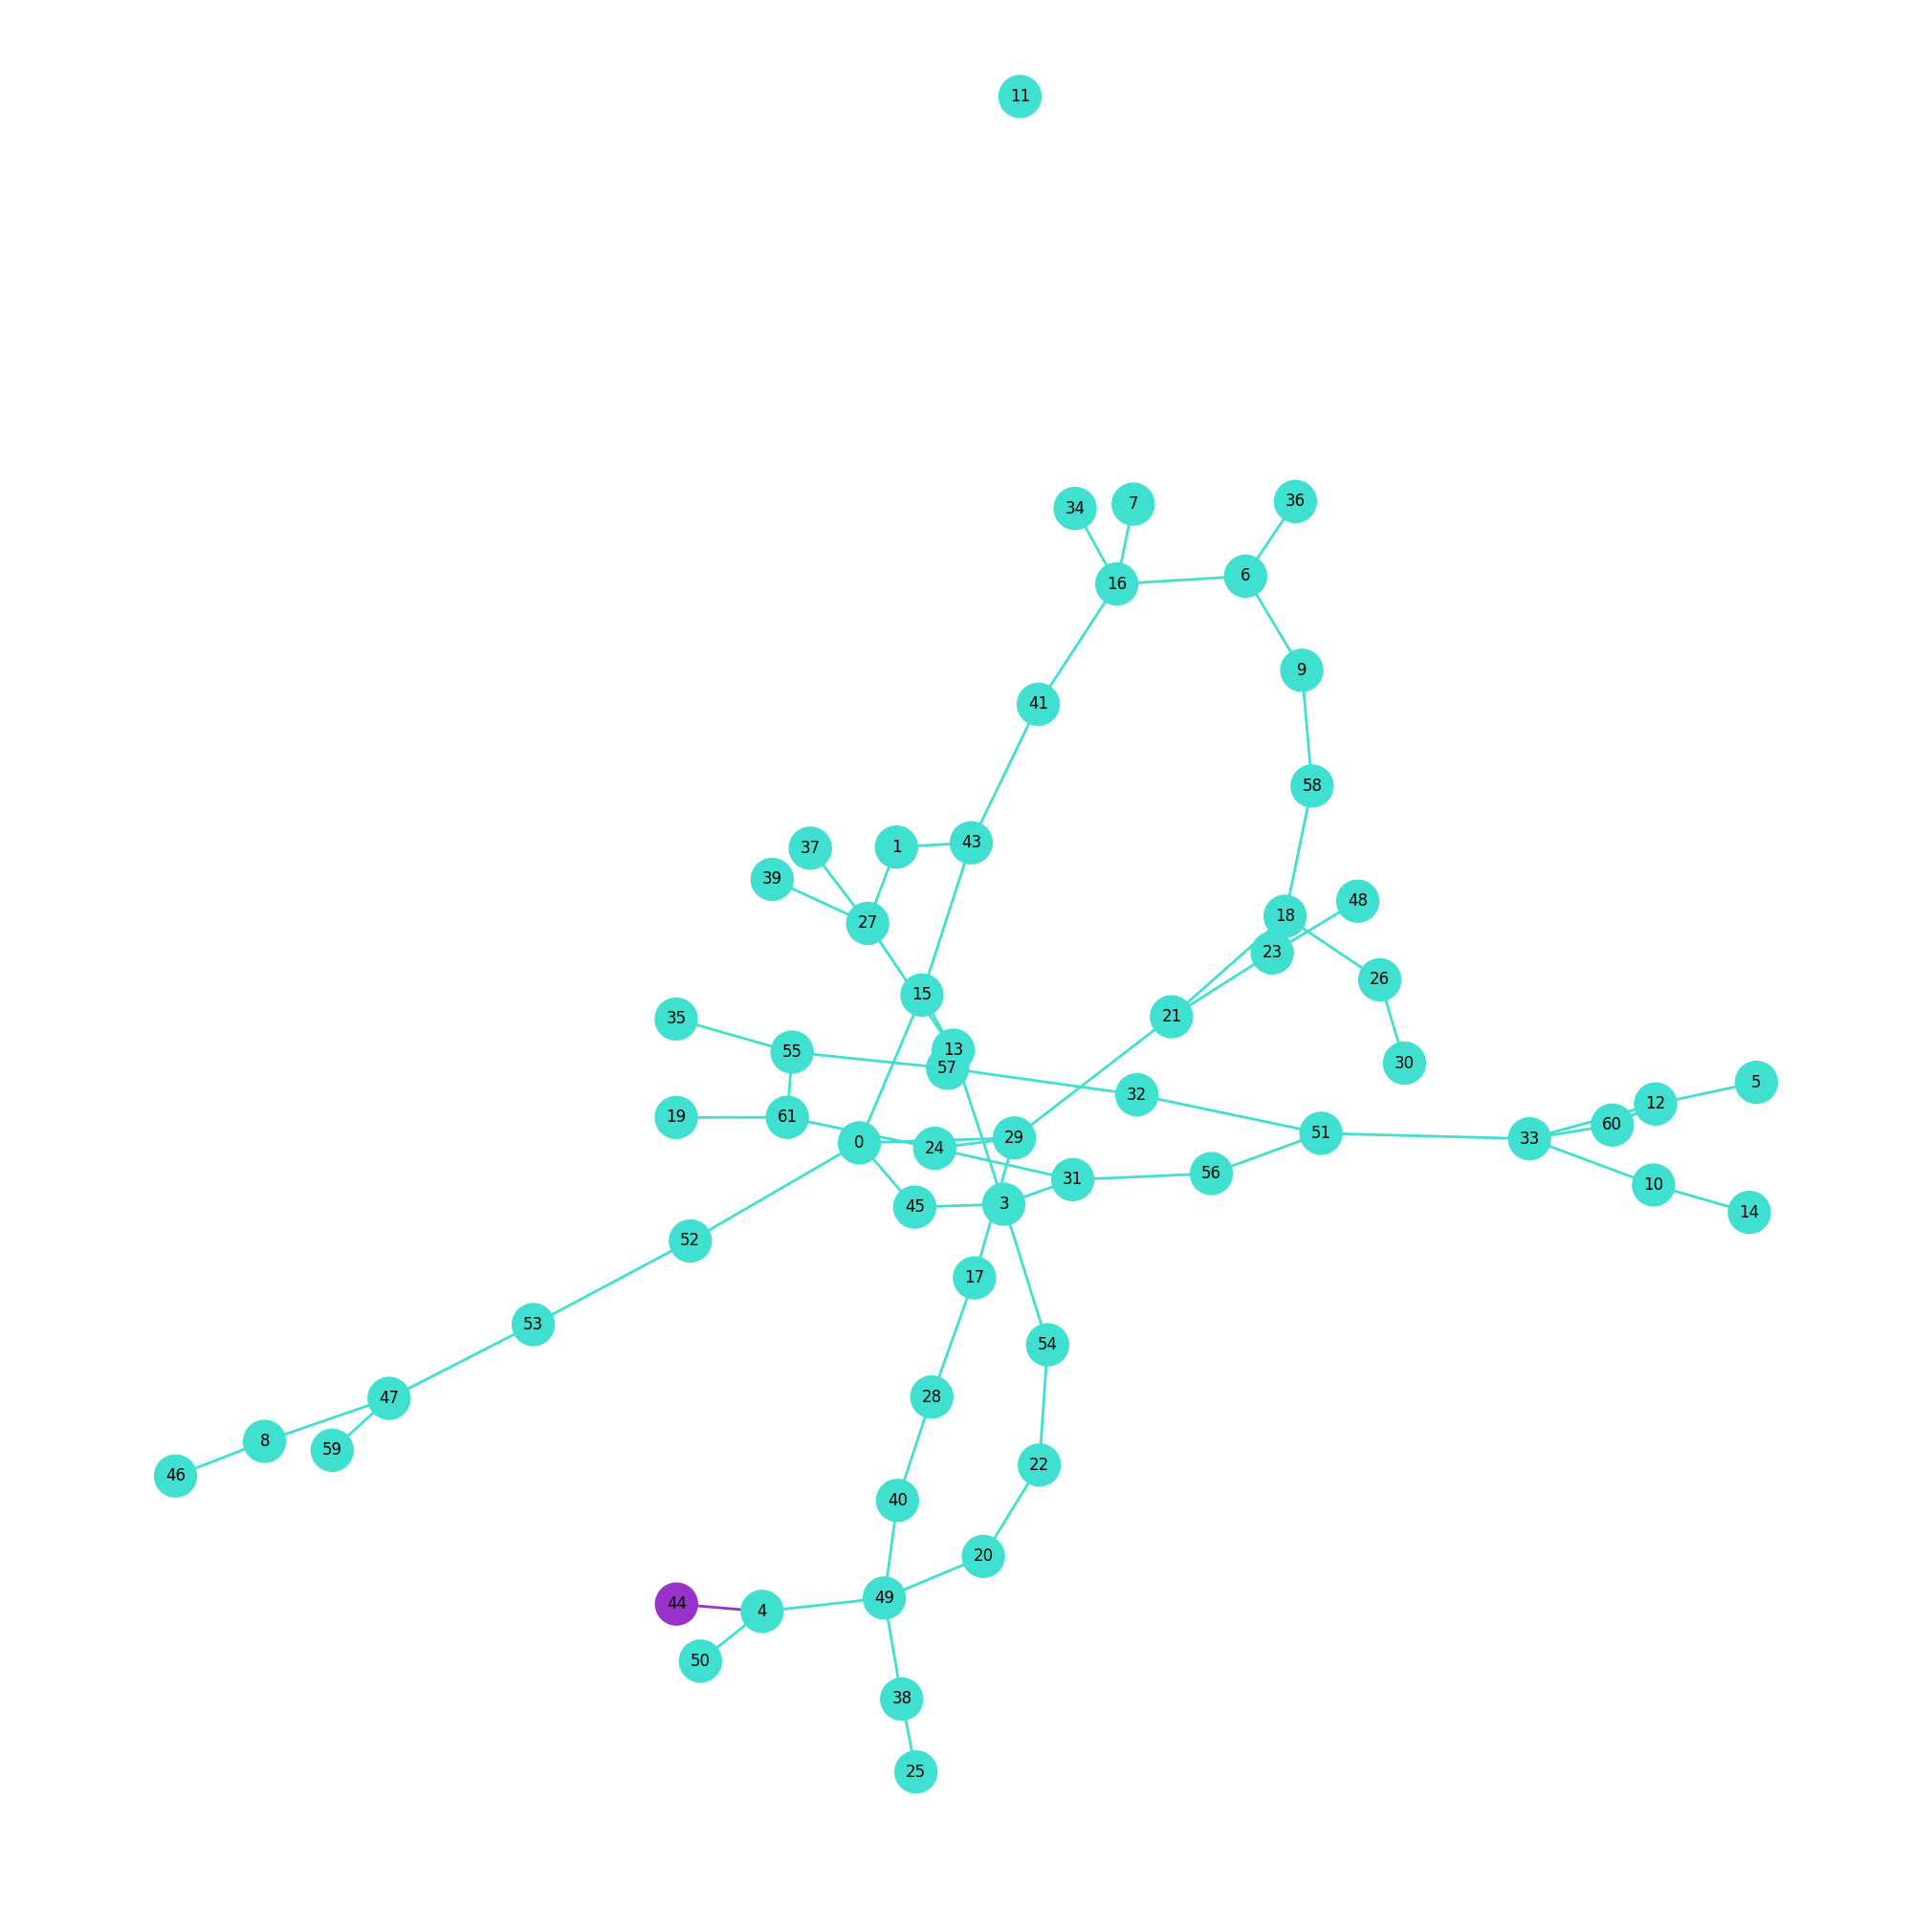

step 3


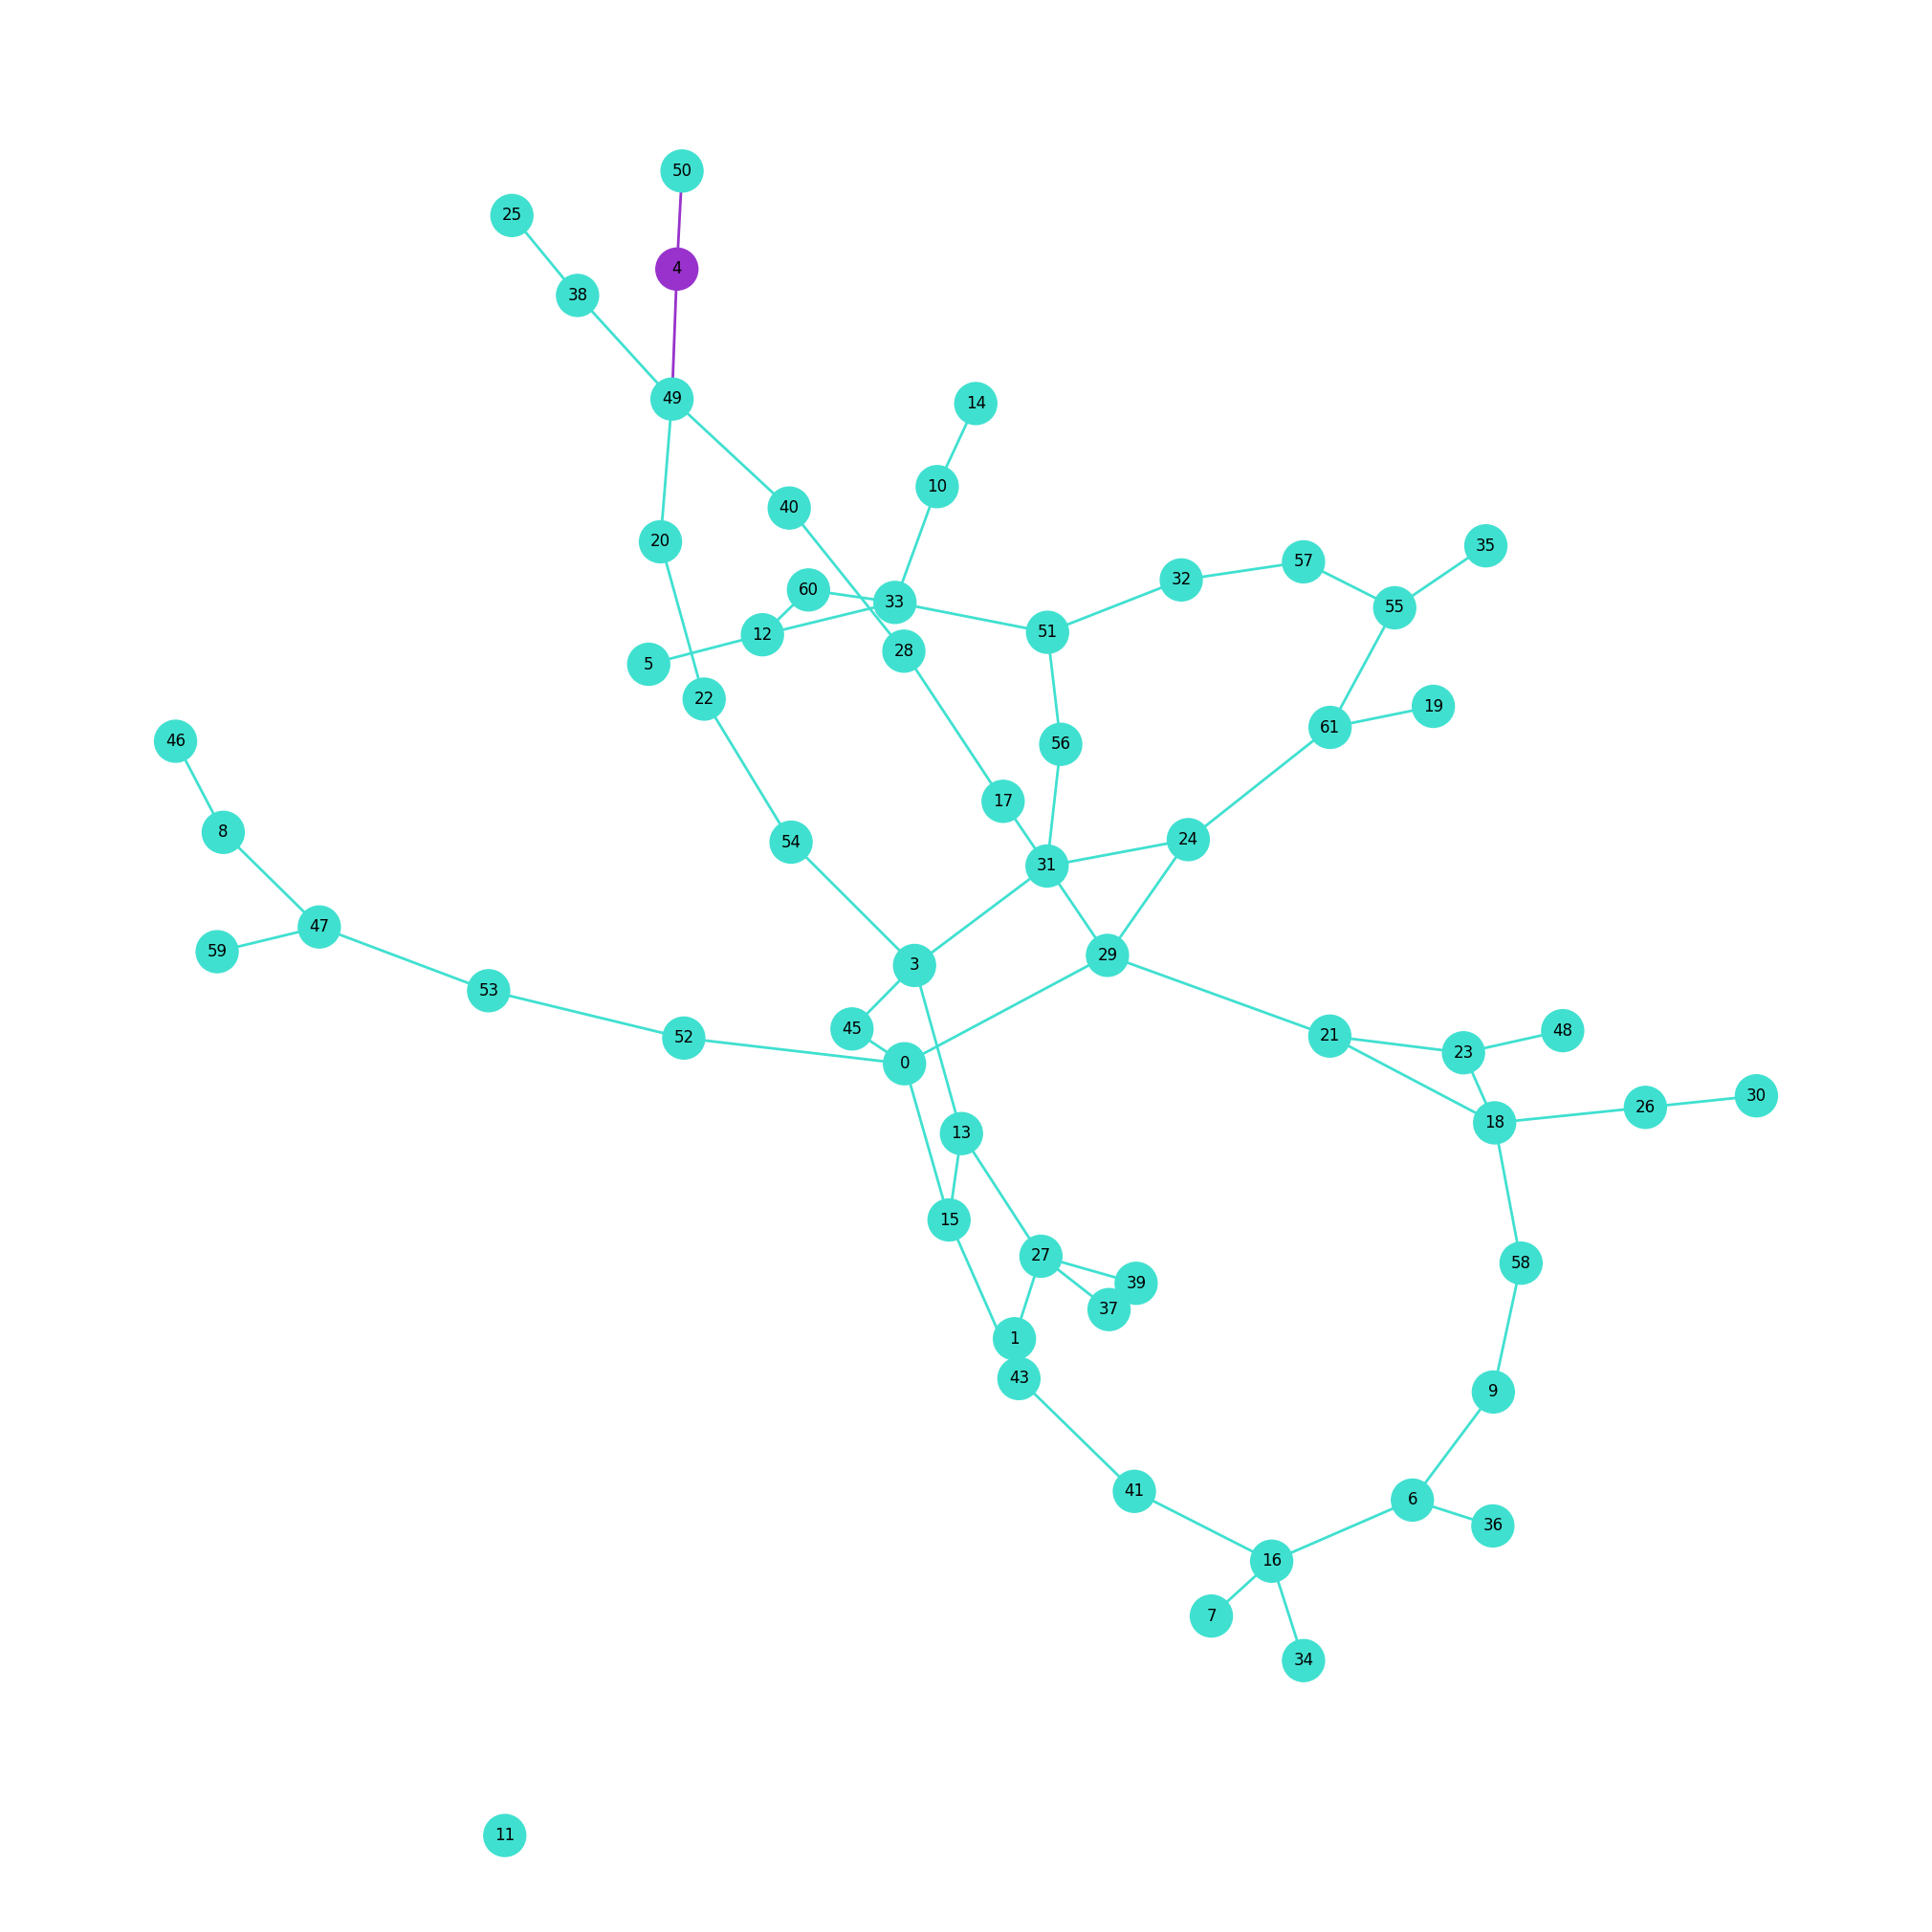

step 4


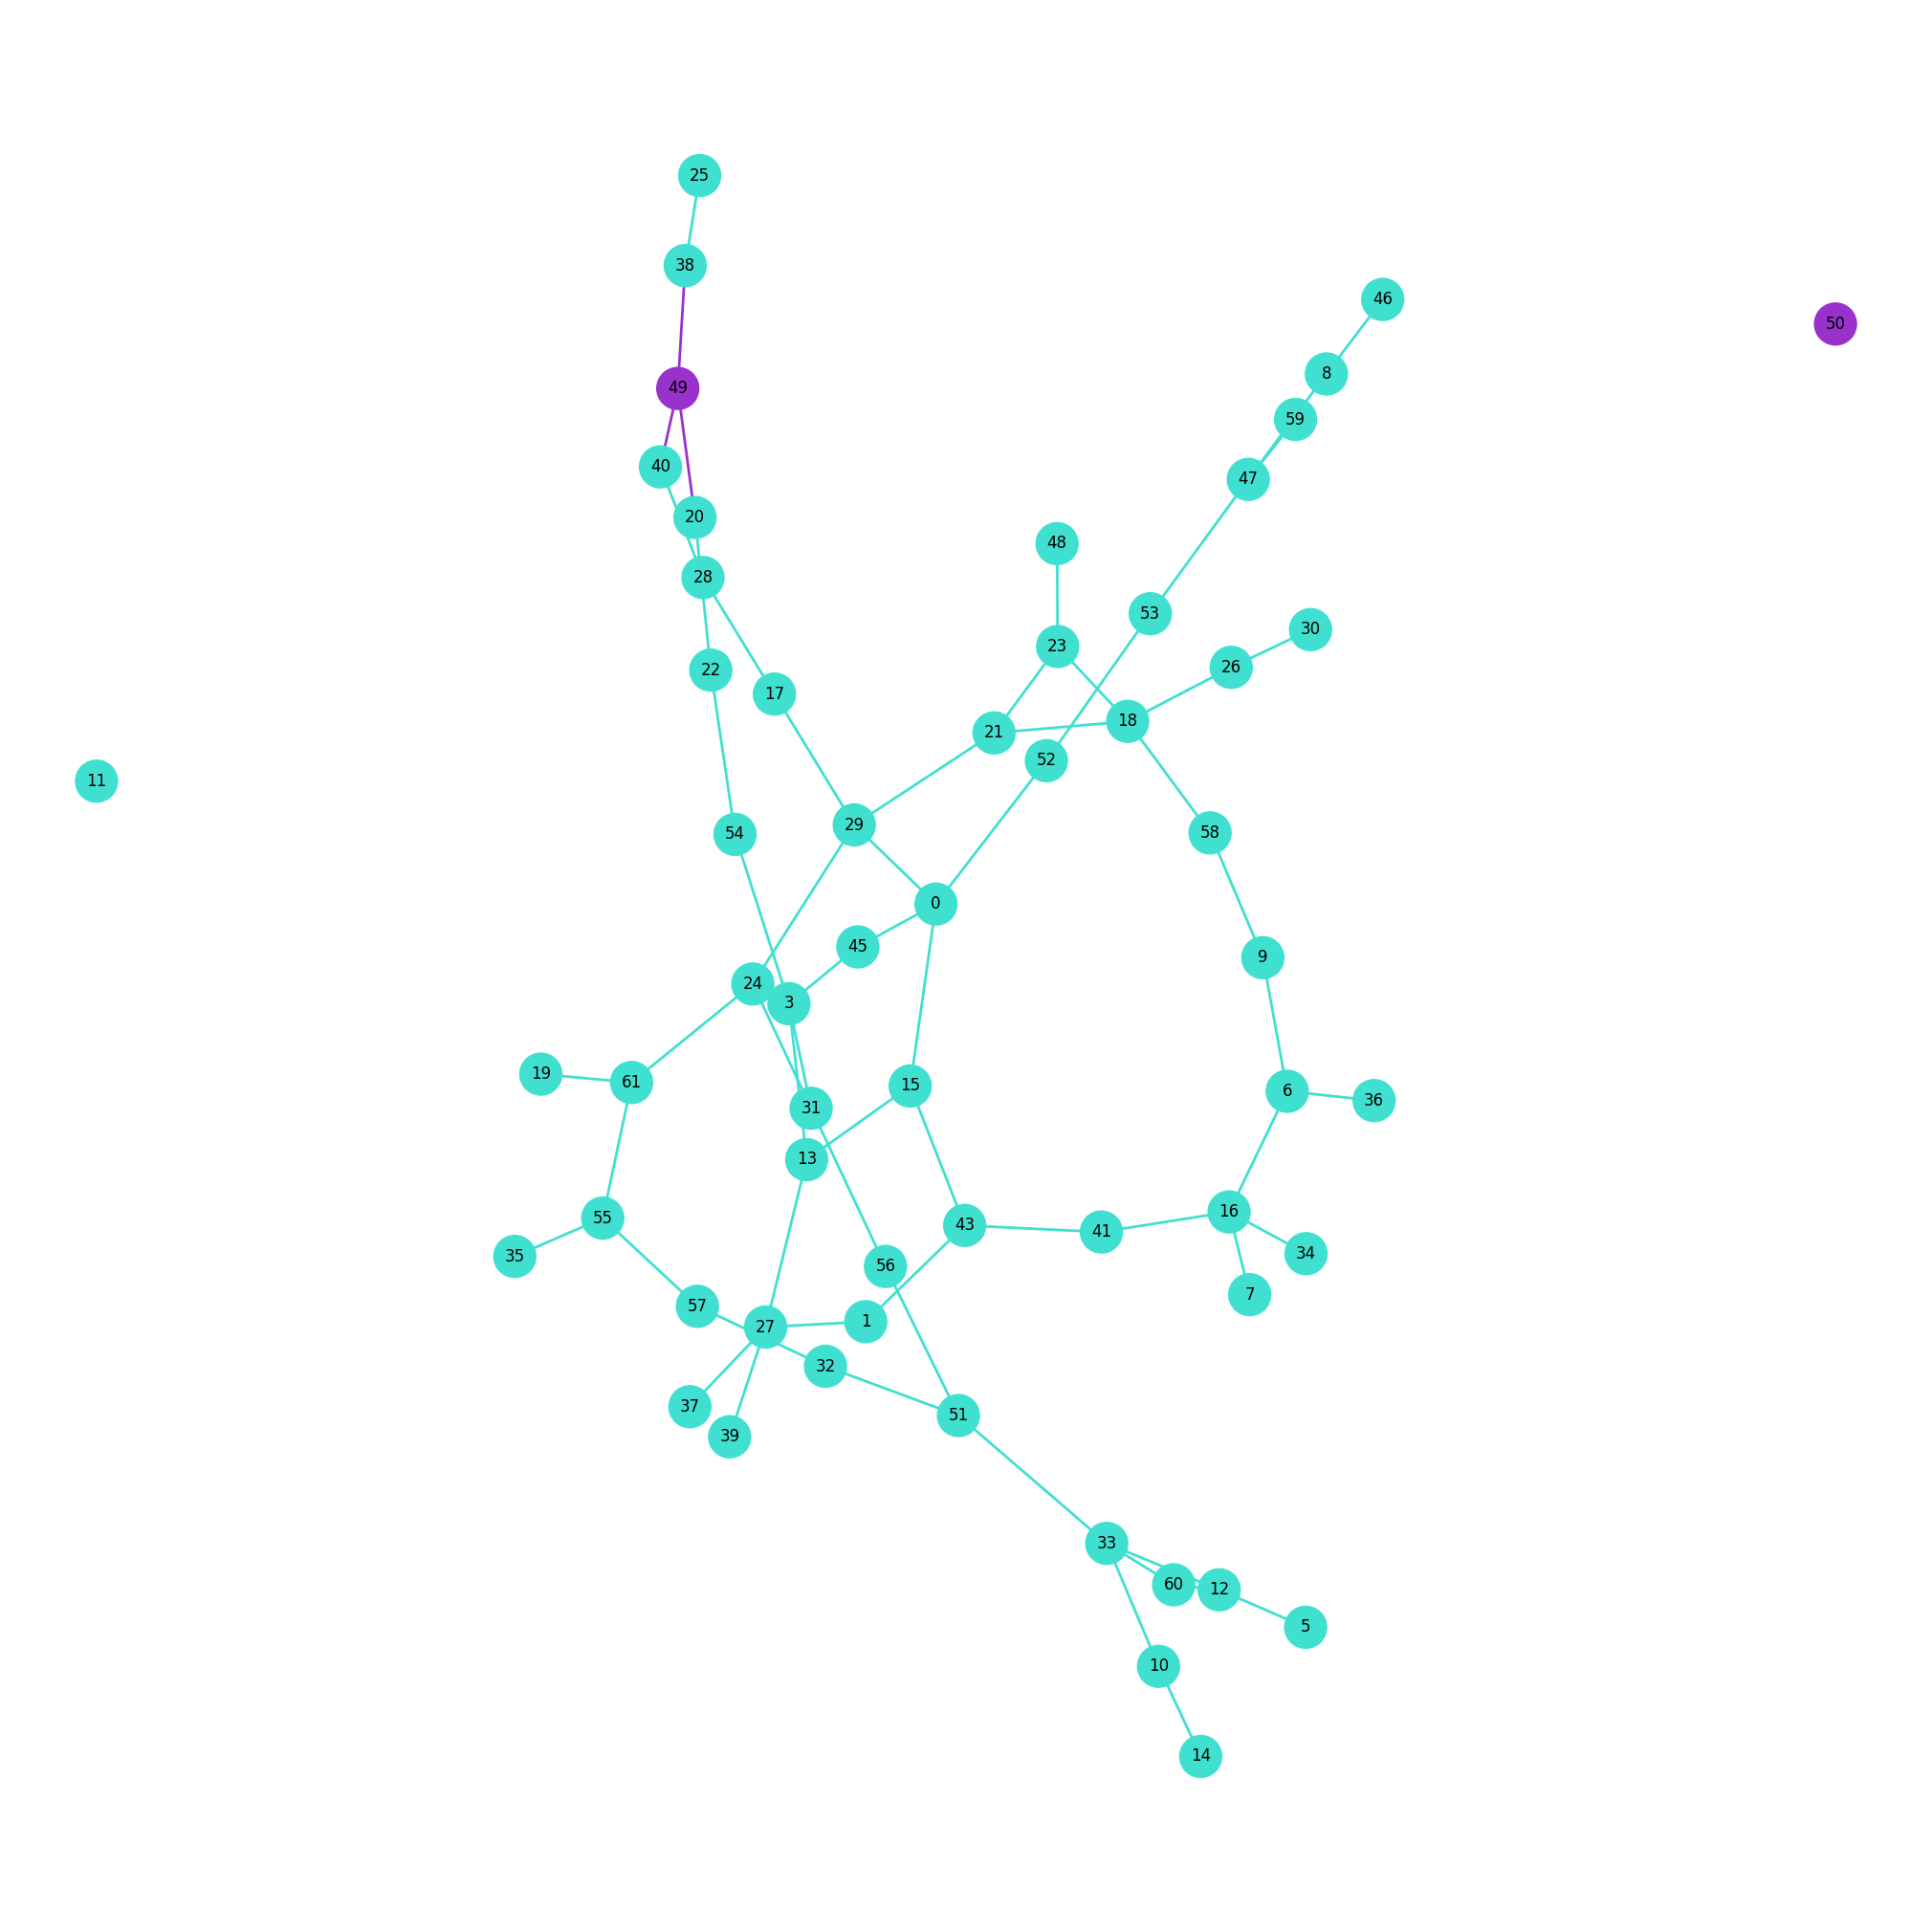

step 5


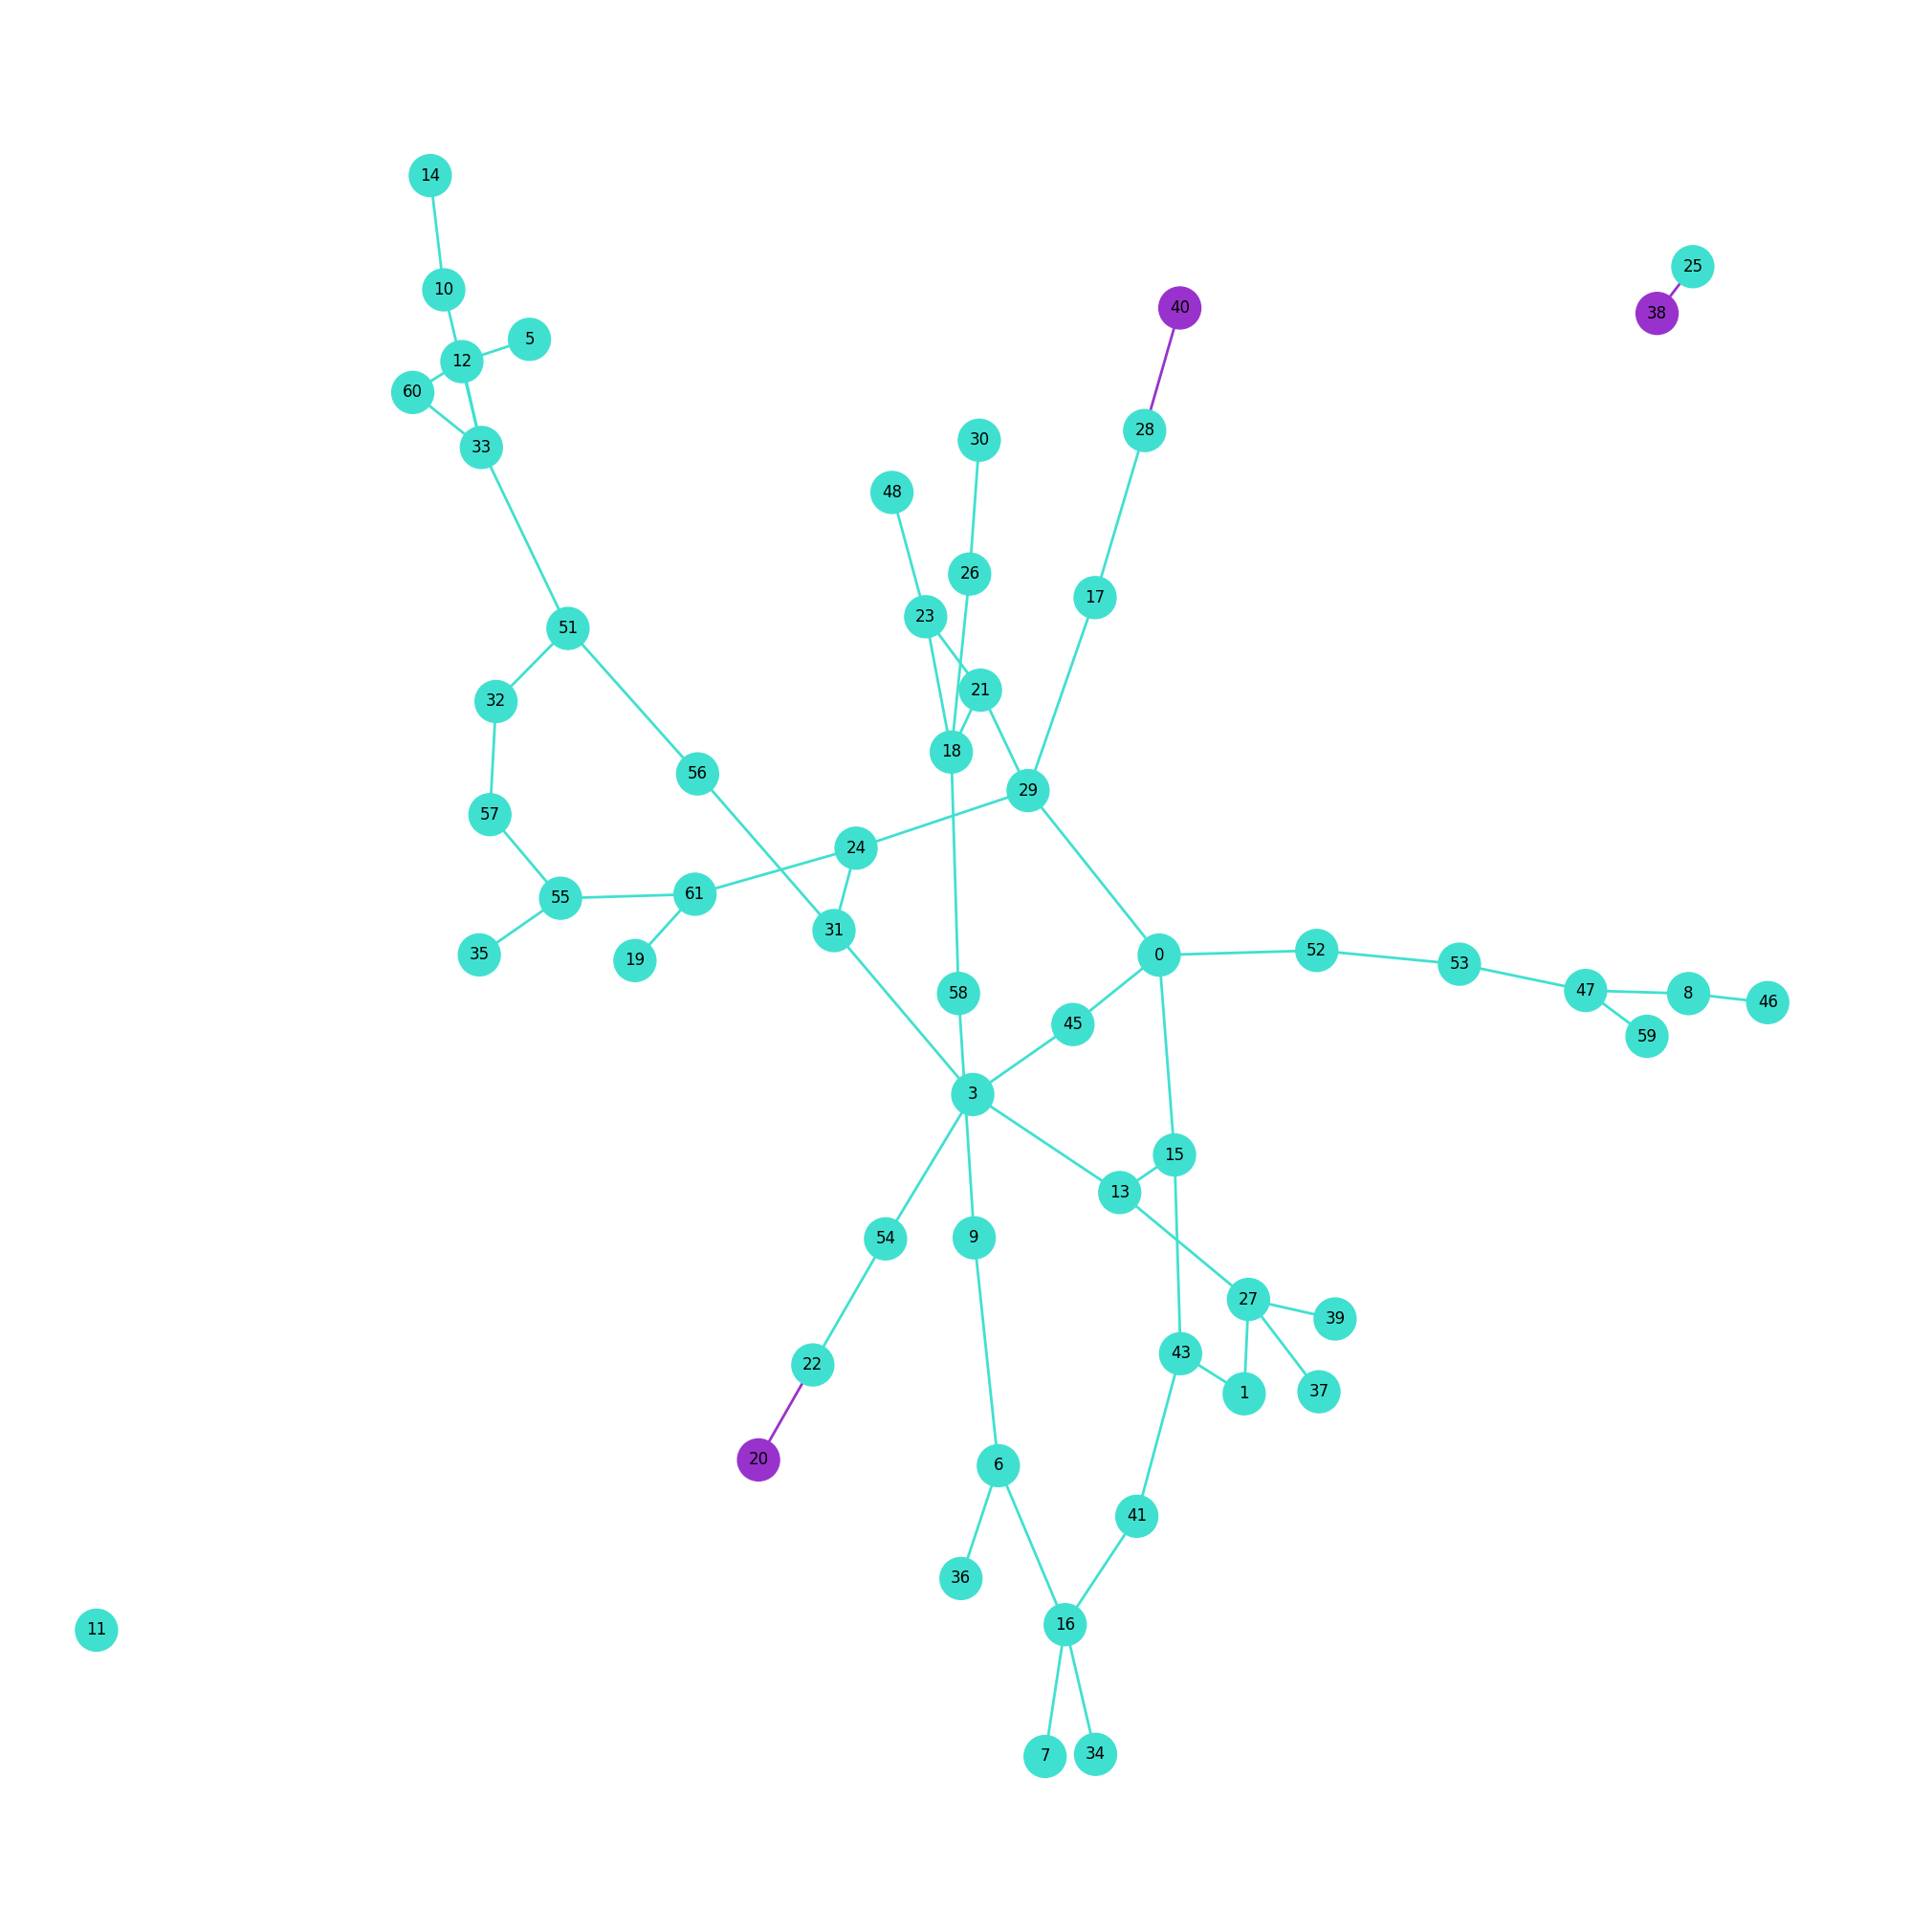

step 6


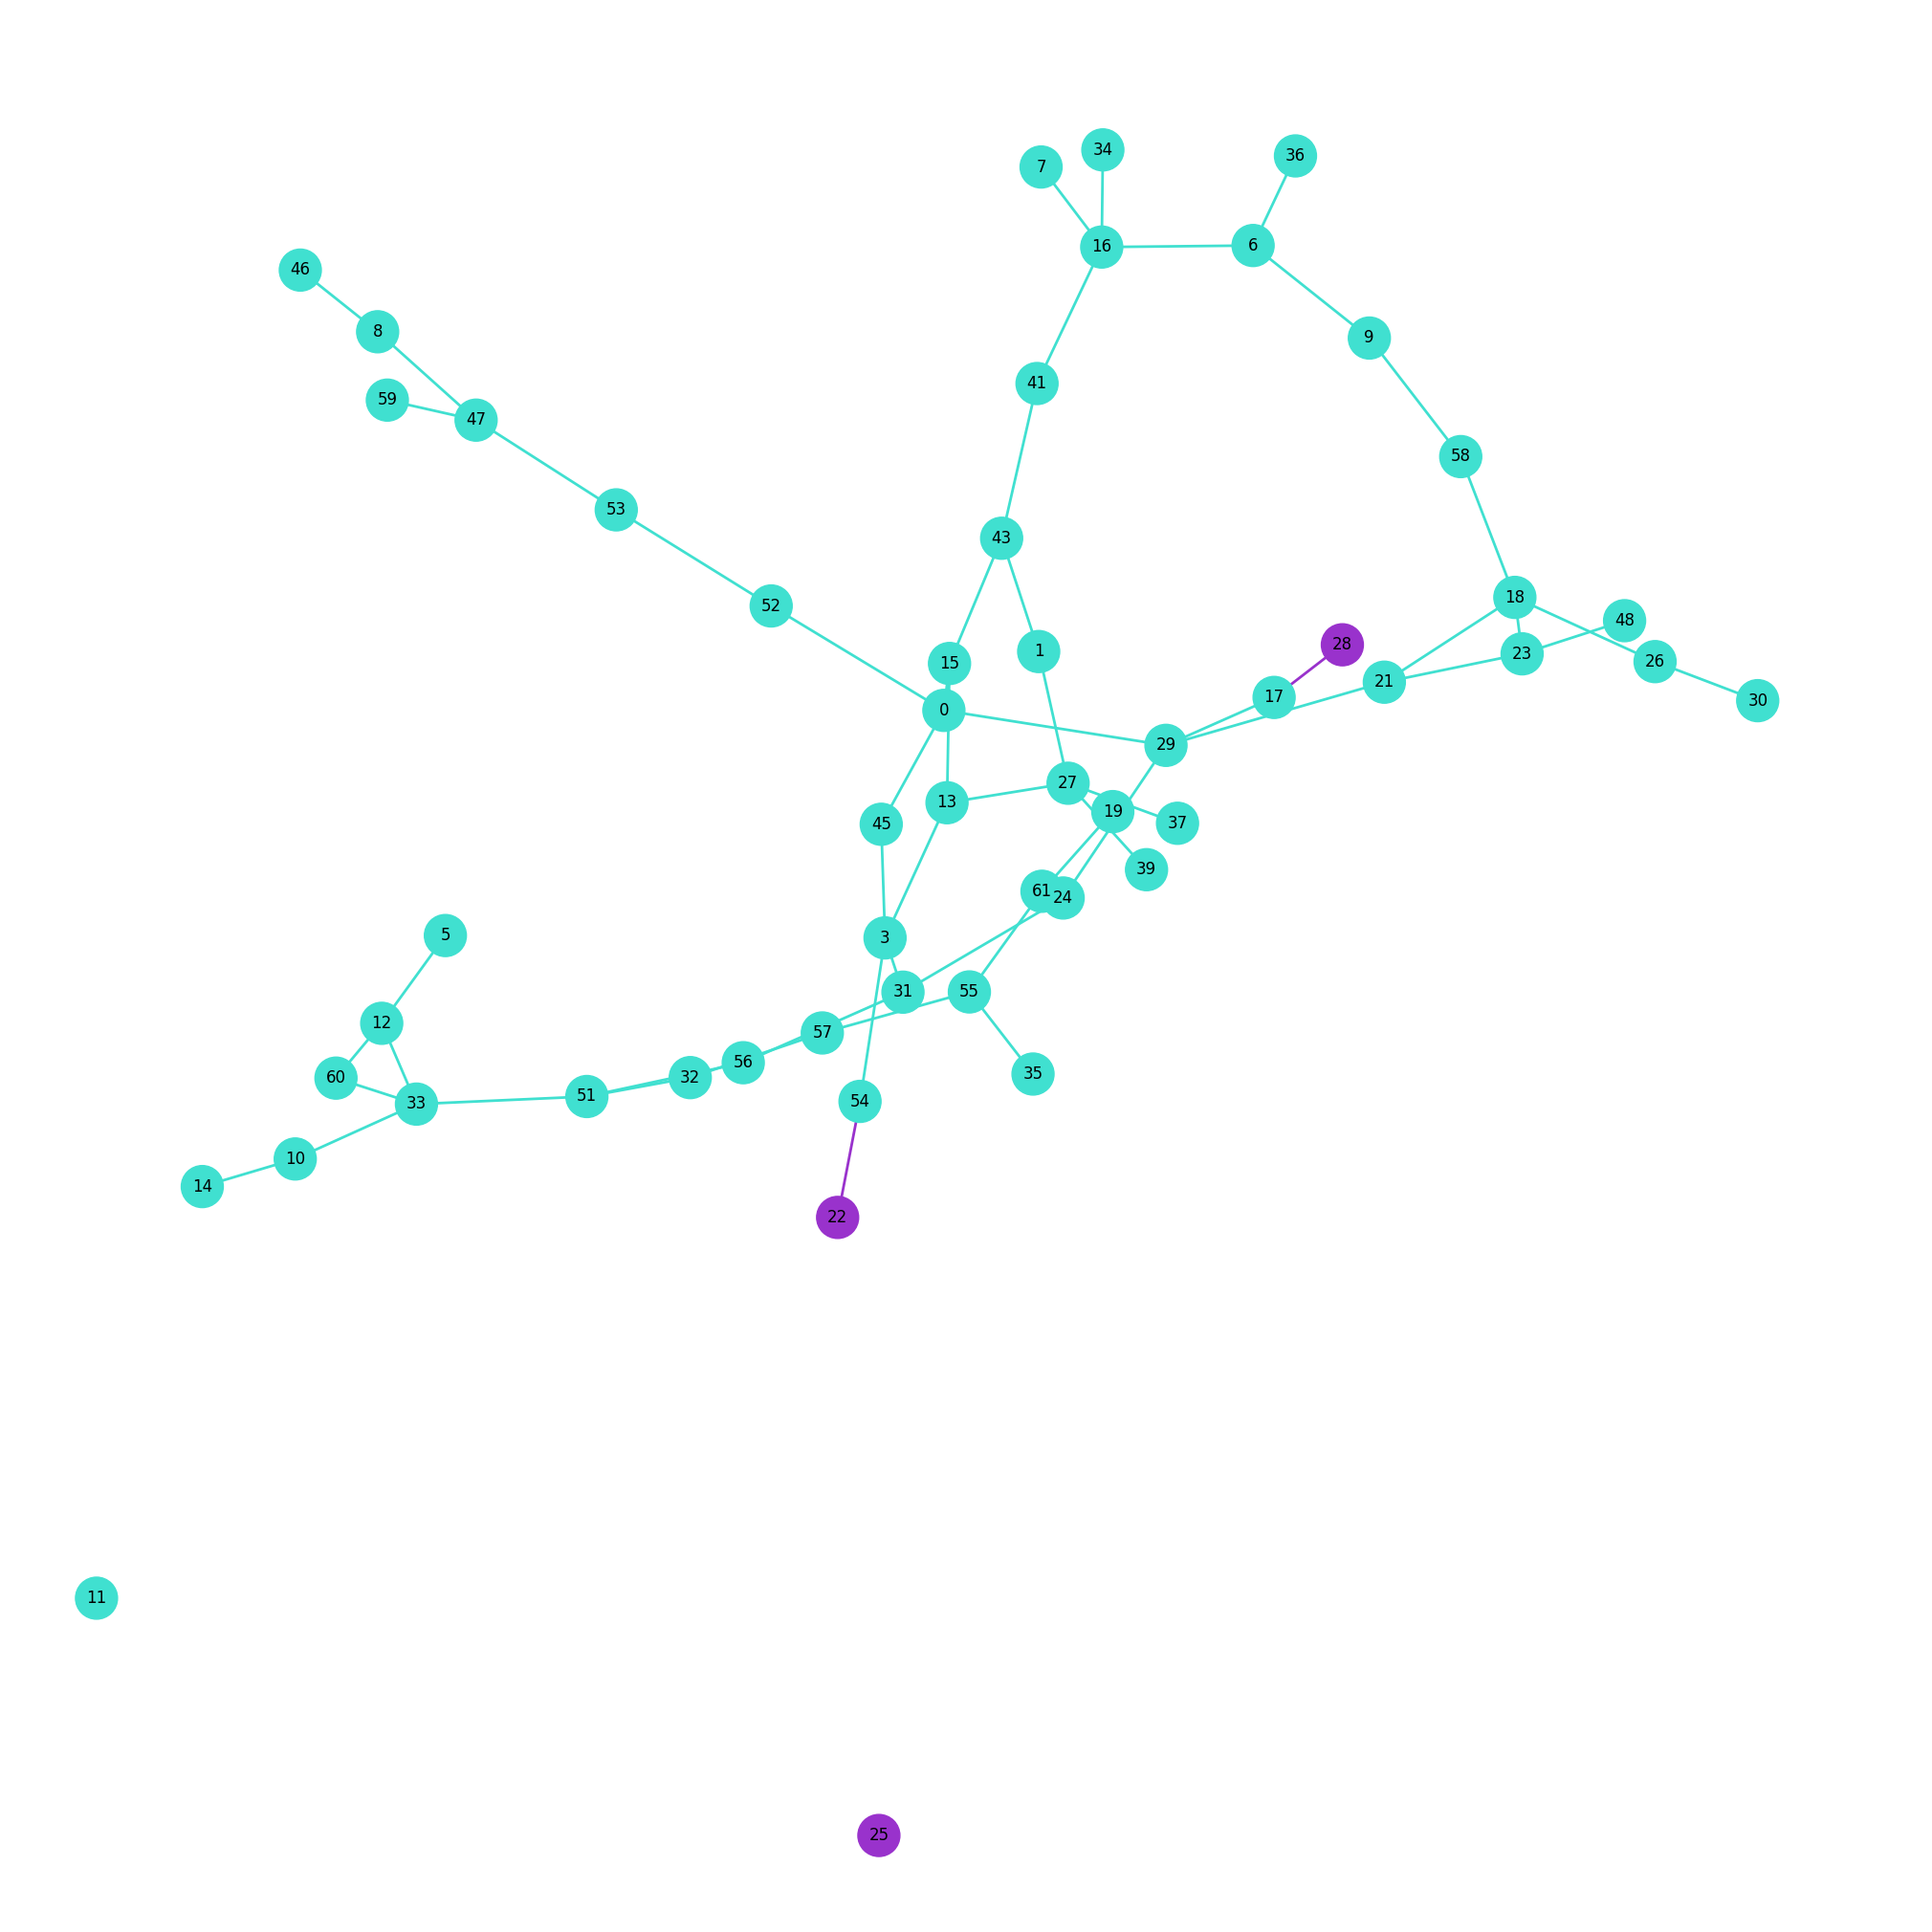

step 7


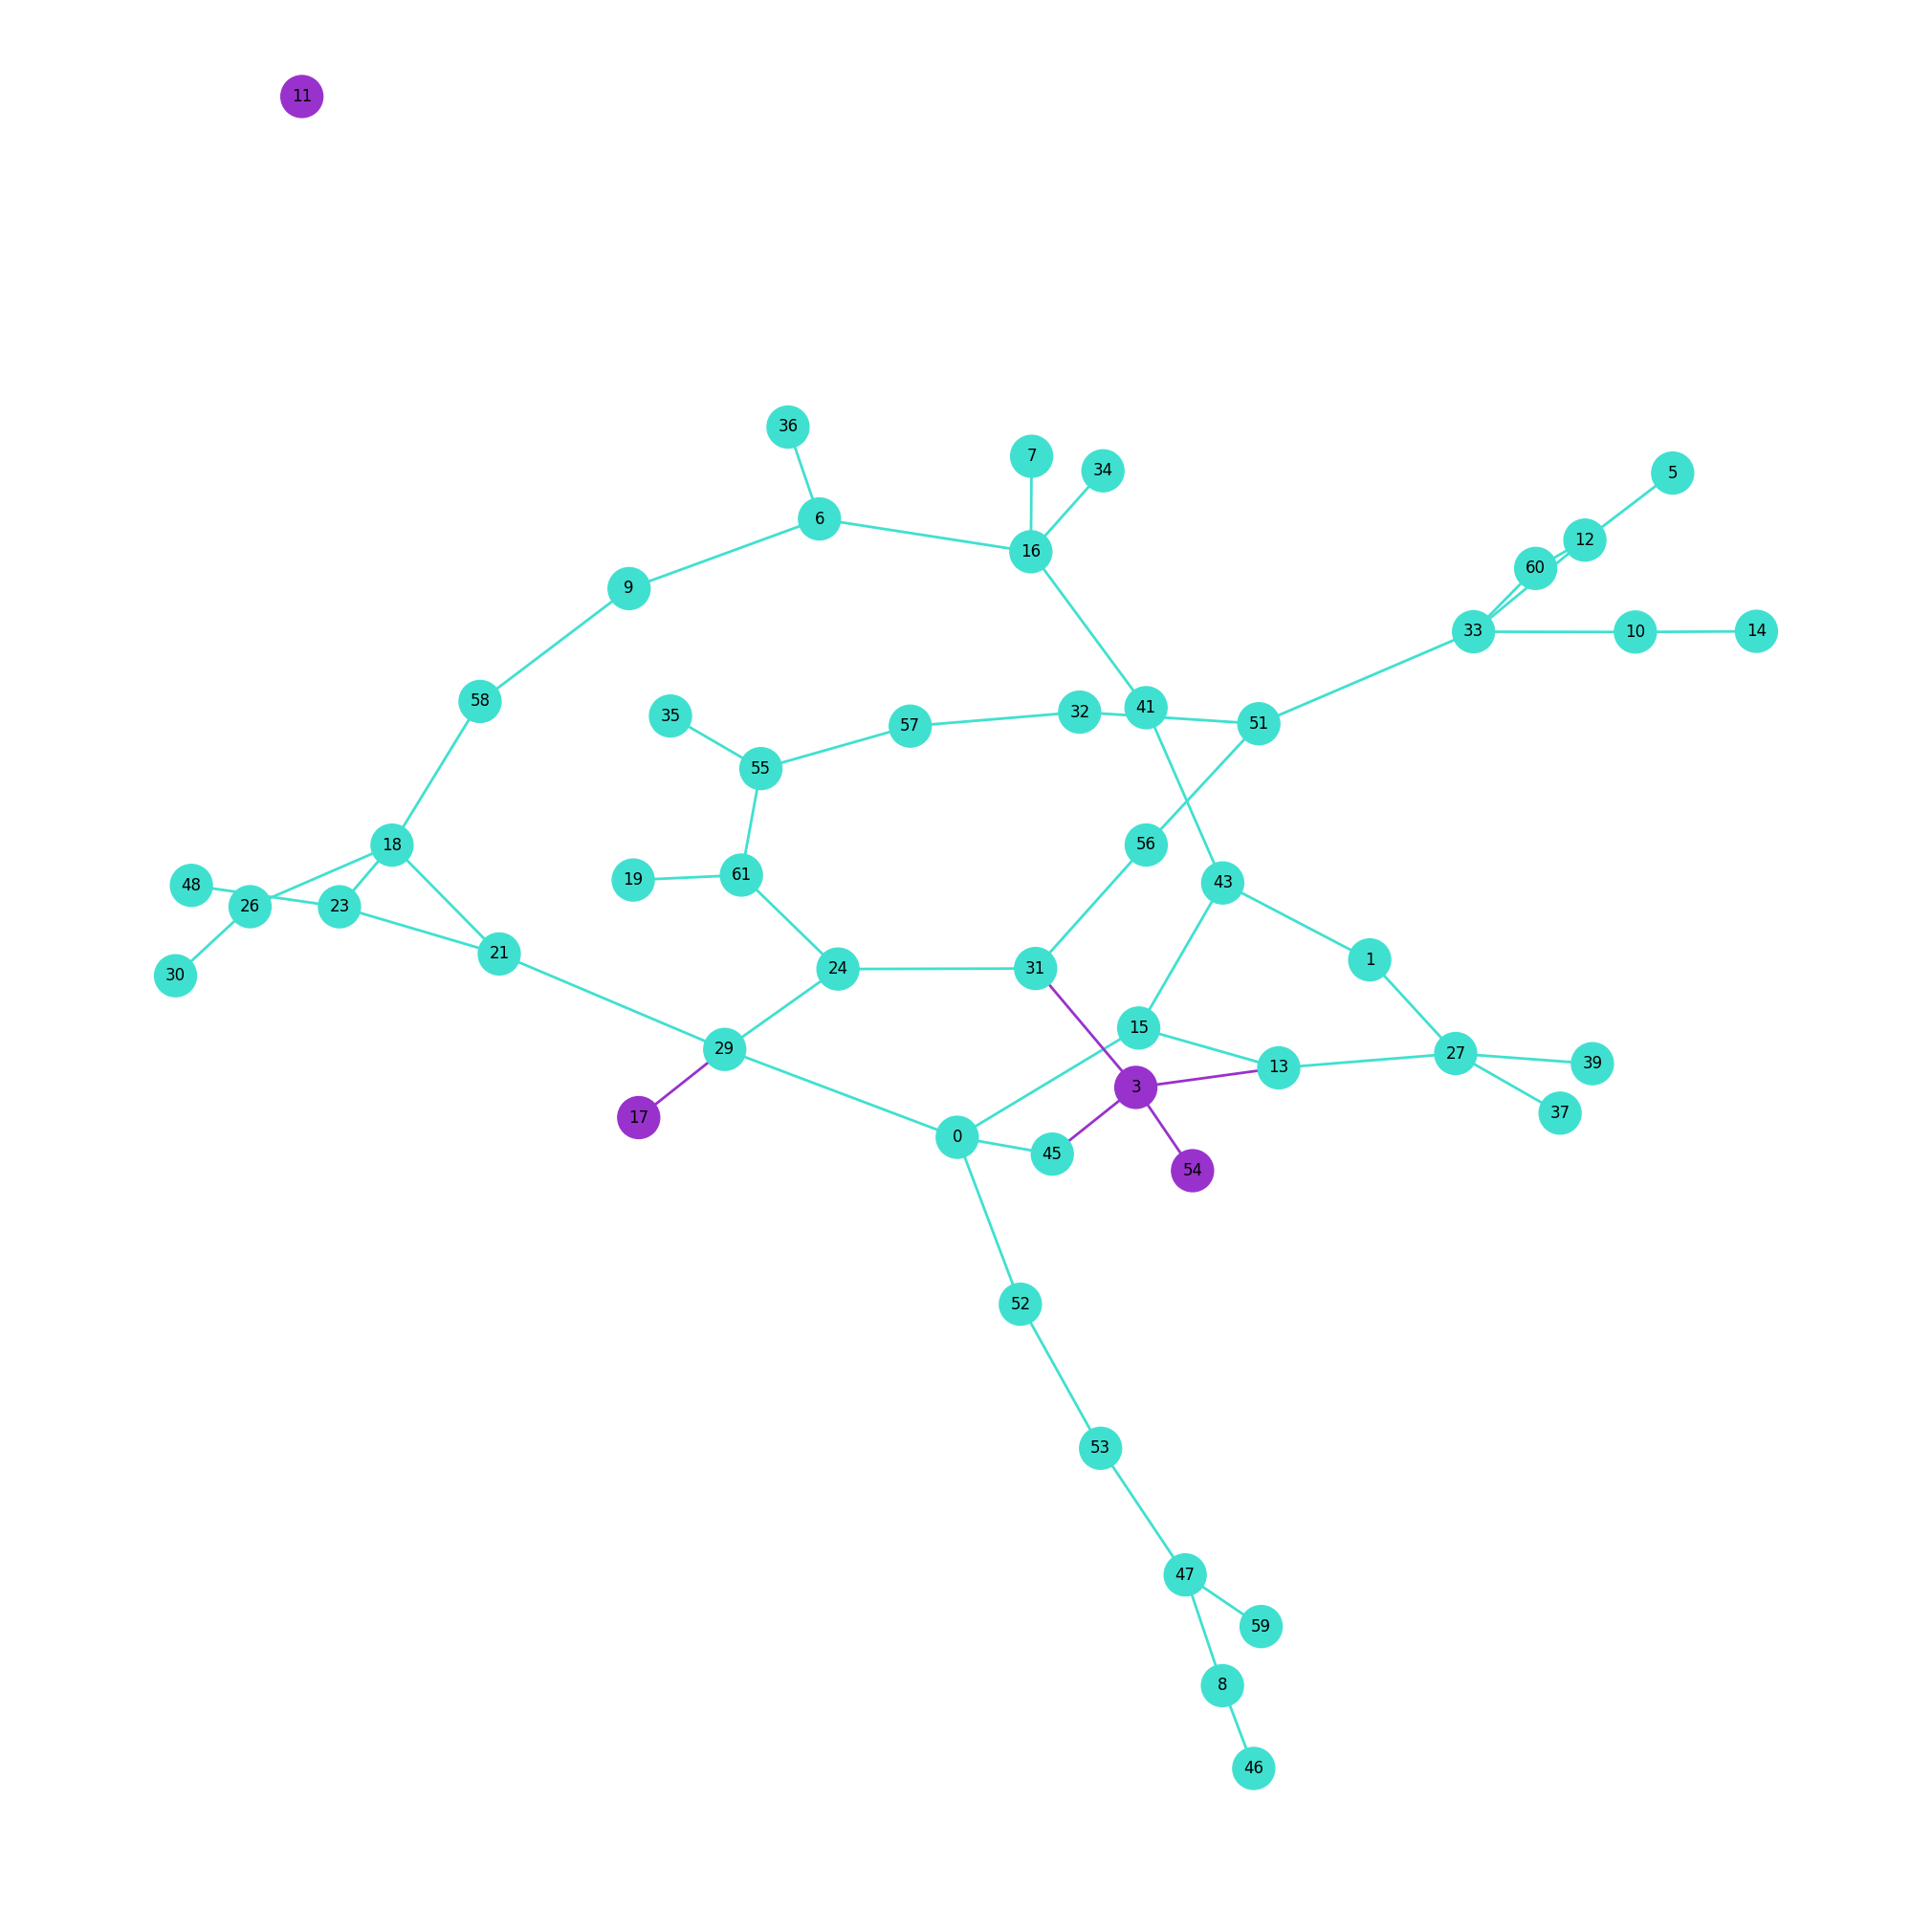

step 8


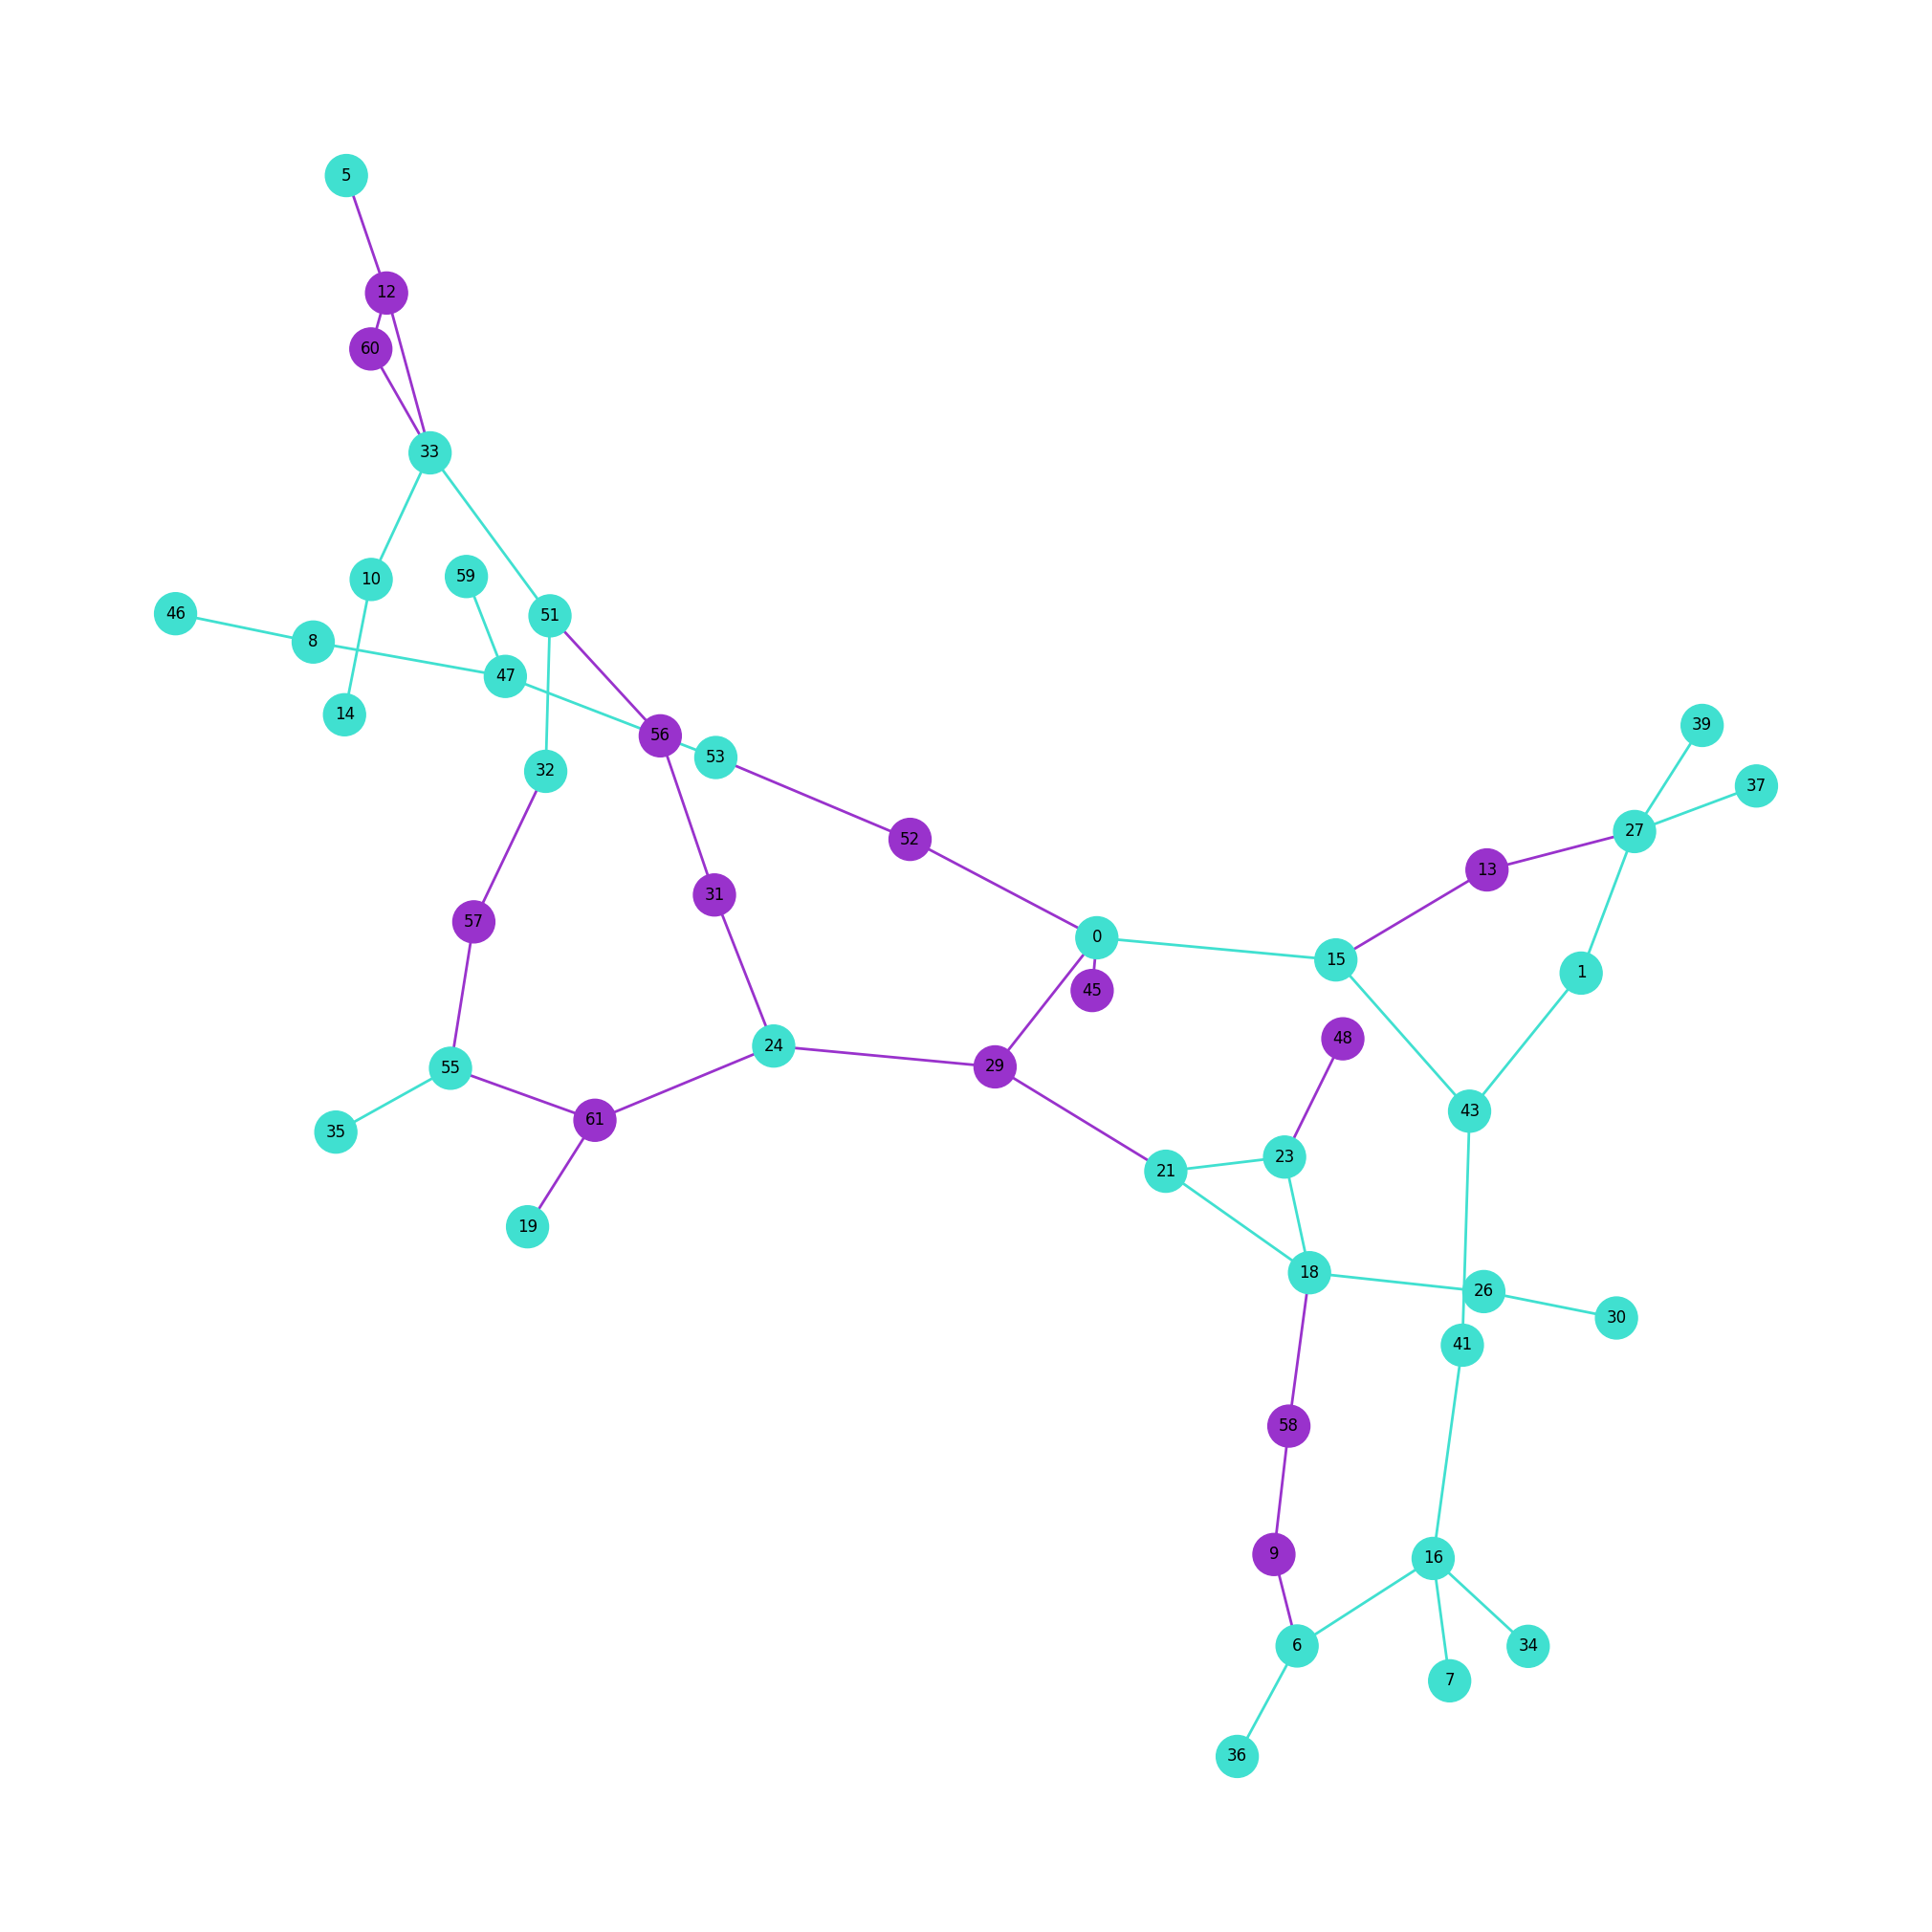

step 9


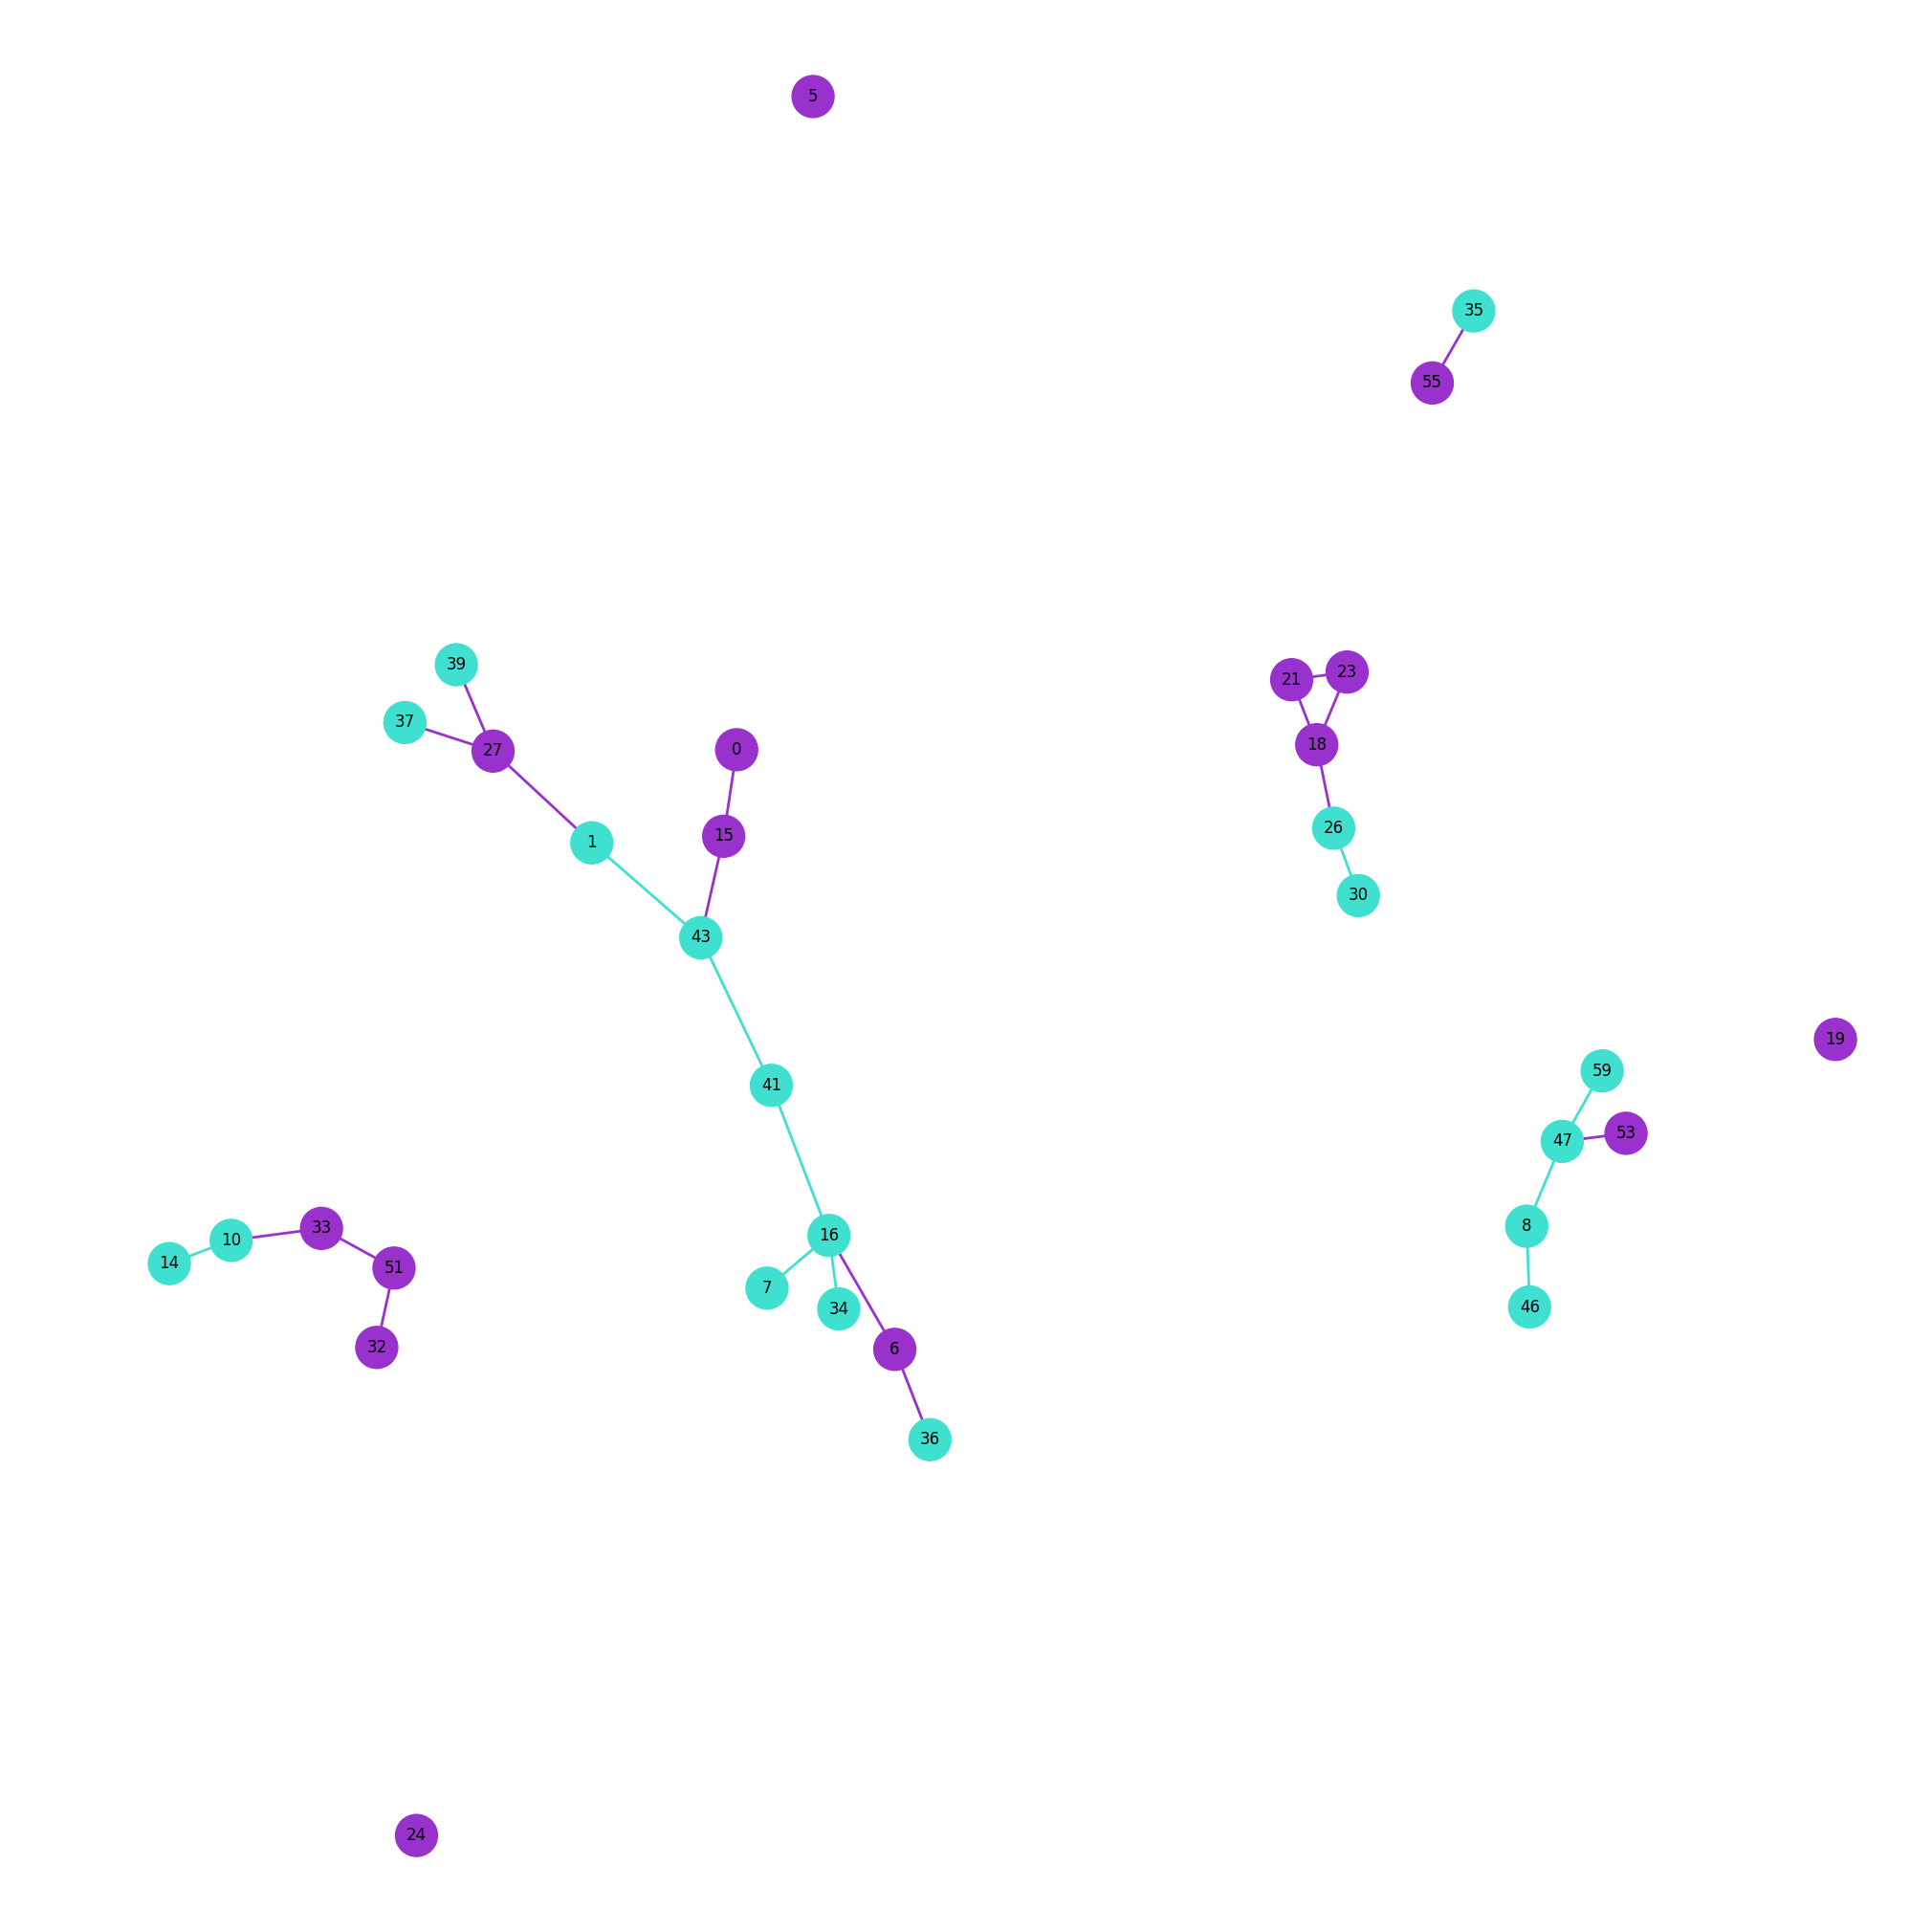

step 10


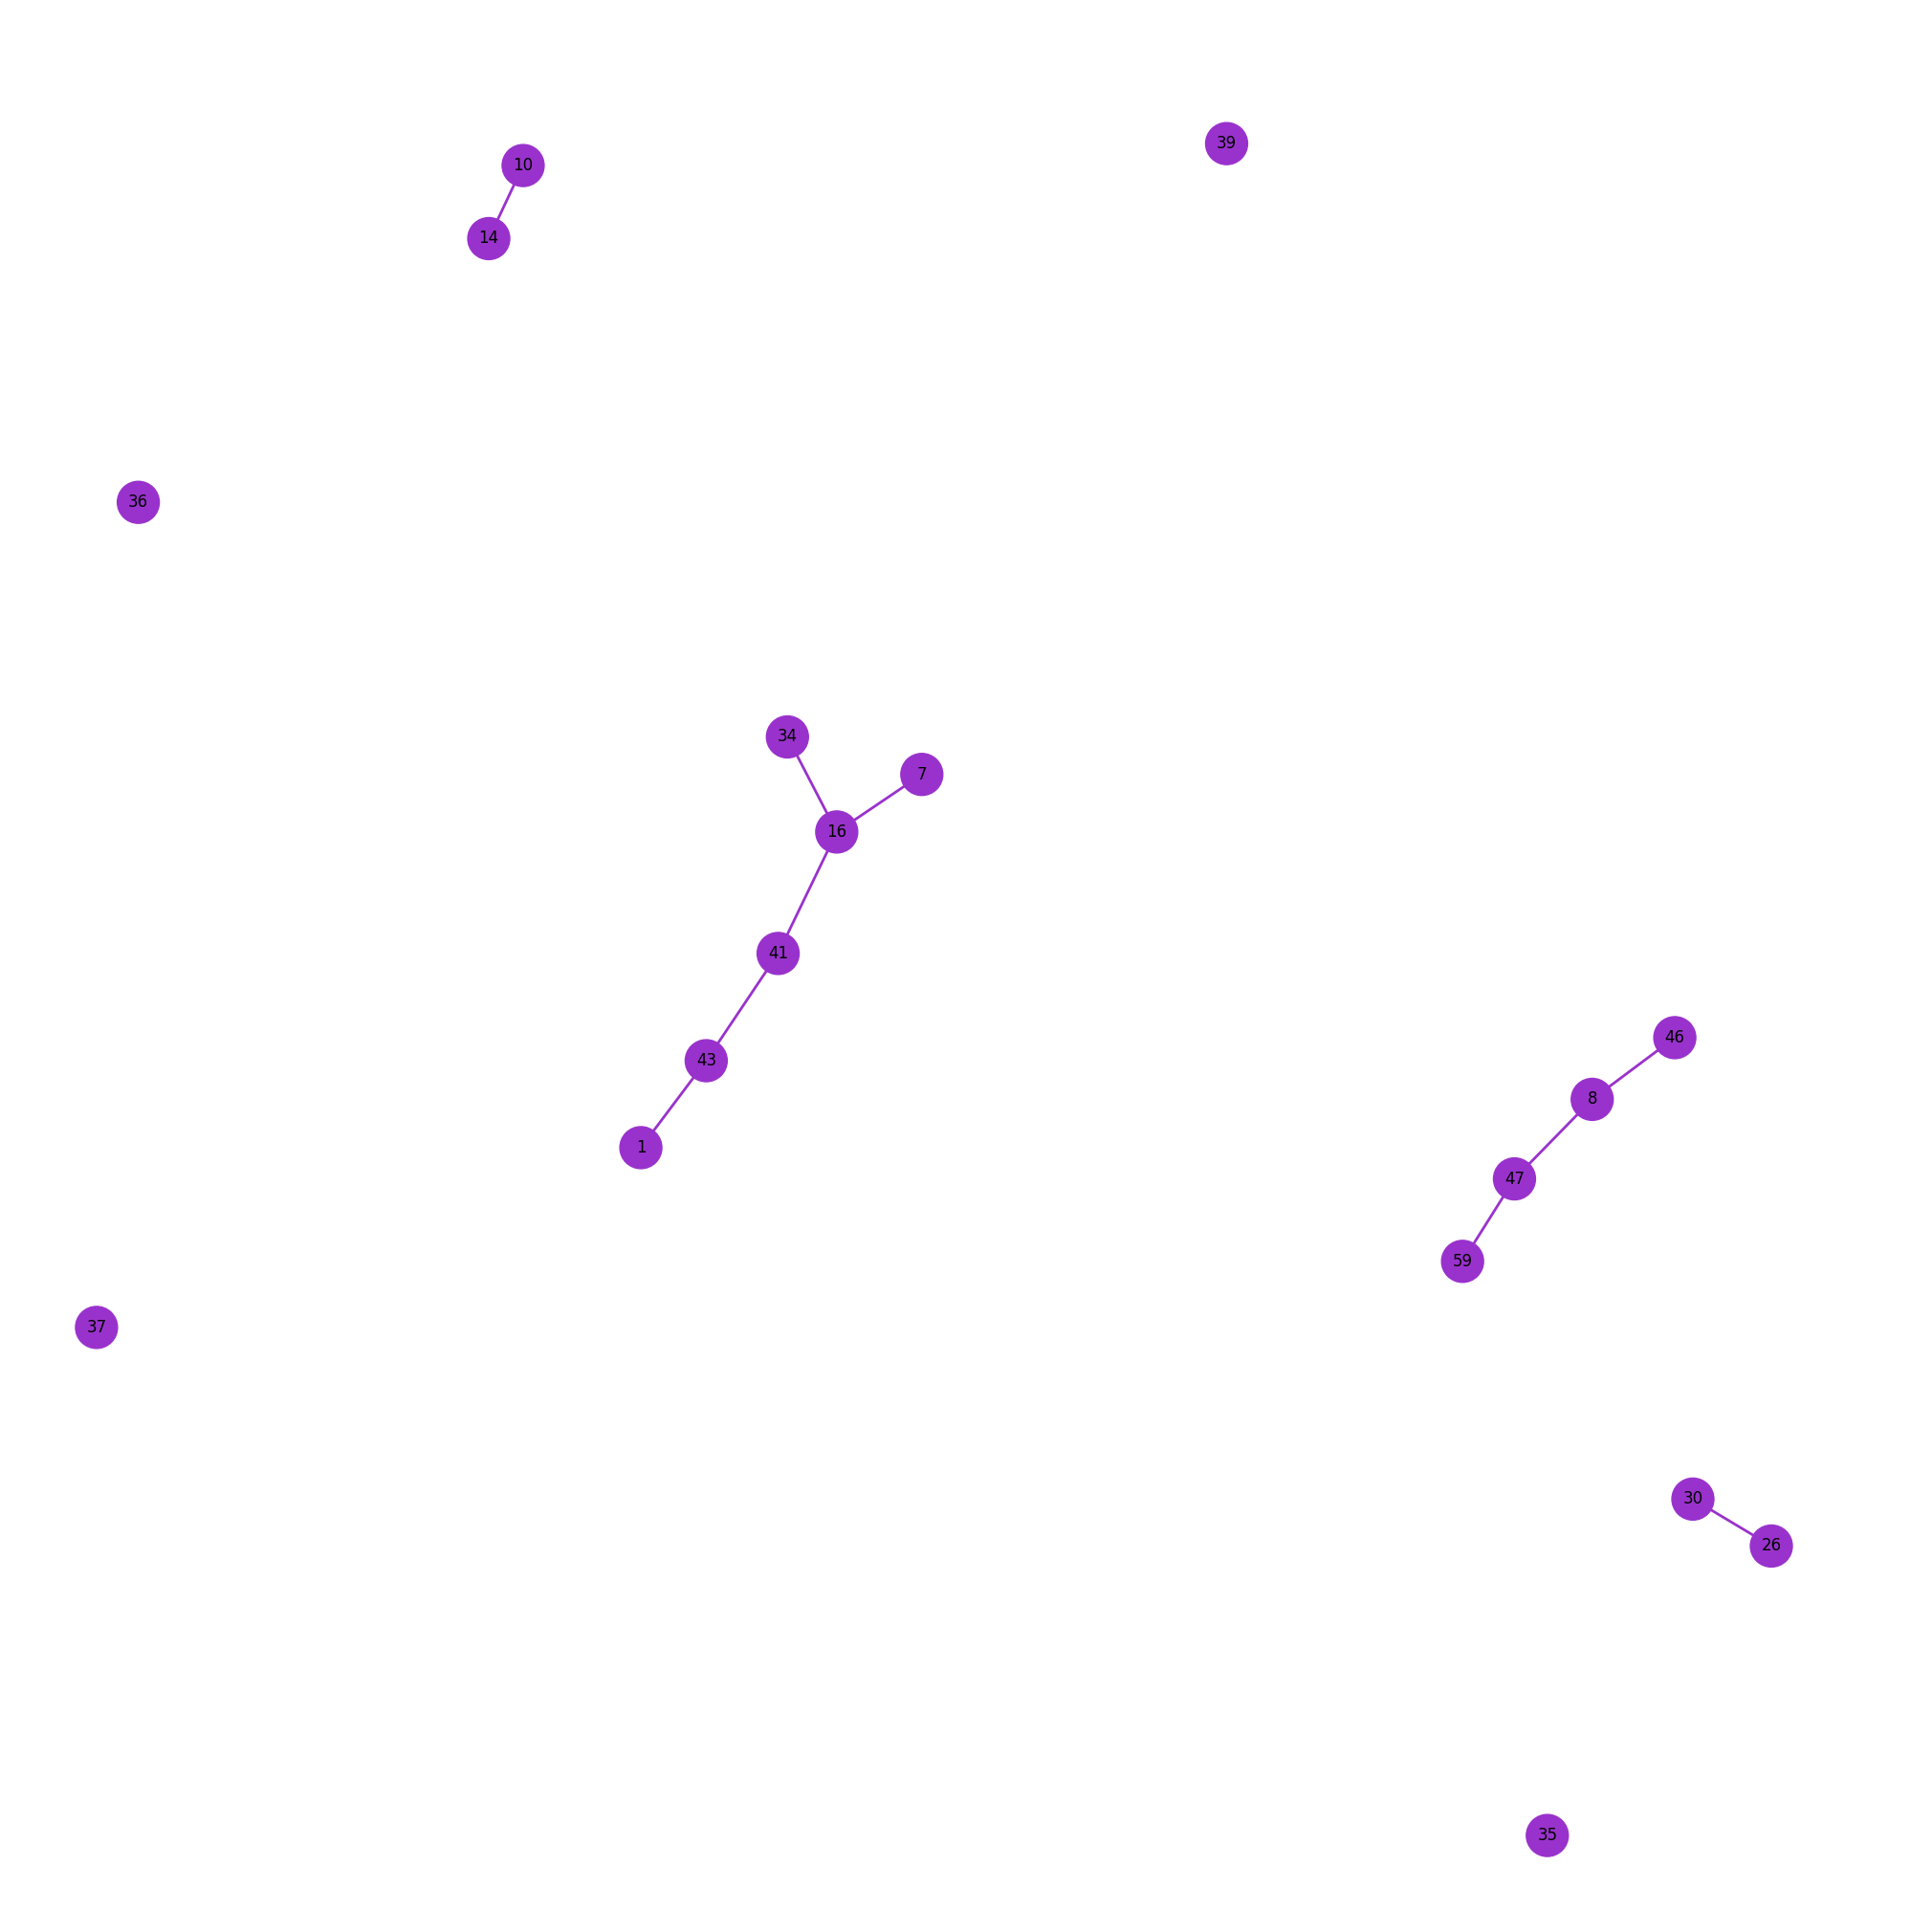

step 11


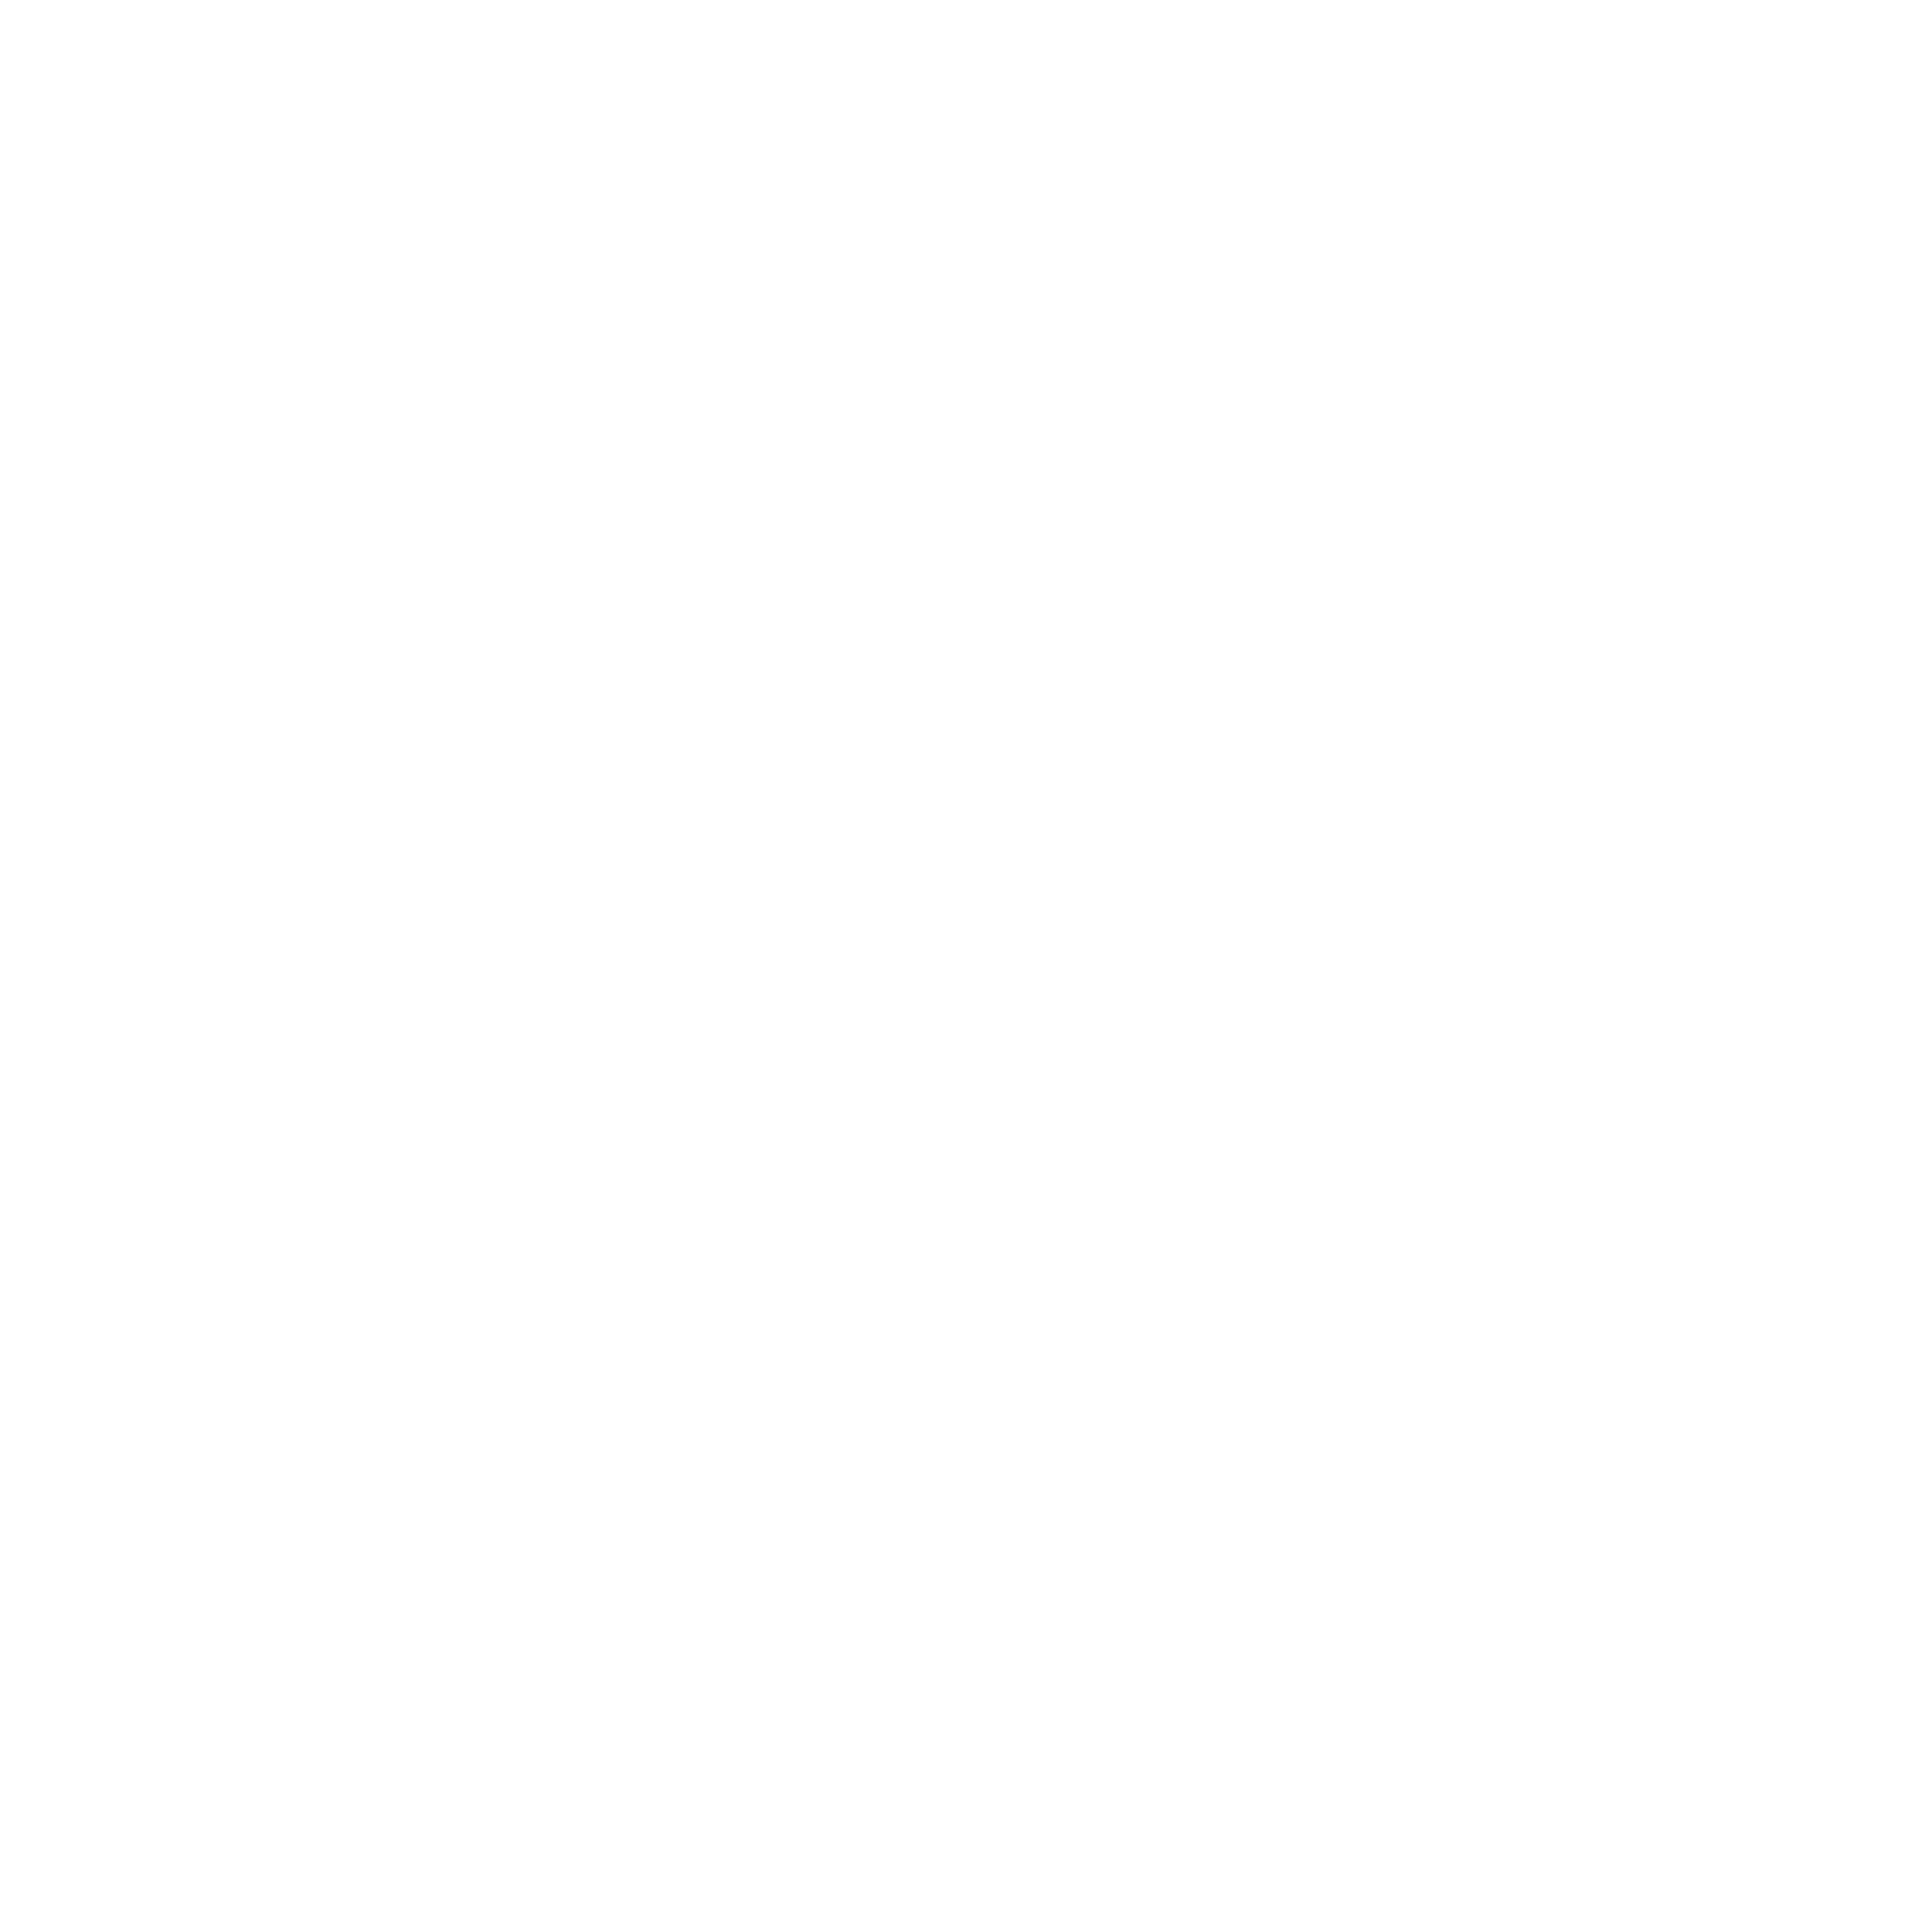

(1, 11, [62, 61, 60, 59, 58, 56, 53, 50, 46, 33, 18, 0])

In [47]:
destruction(G, 2, True)